In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
#Reading previous_application.csv & checking the data frame
df=pd.read_csv('e:/trainity/project 6/previous_application.csv')
print(df.head())

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CN

In [3]:
#getting the summary of data frame
df.info(null_counts=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12192\1982639406.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [4]:
df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [5]:
#checking null percentages of all columns
df.isnull().sum()/len(df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [6]:
#getting columns where the null percentages is greater than 40
null_percentages=df.isnull().mean()*100
cols_to_drop=null_percentages[null_percentages>40].index
cols_to_drop

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [7]:
len(cols_to_drop)

11

In [8]:
#dropping the columns
df=df.drop(cols_to_drop, axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [10]:
#reading application_data.csv
df1=pd.read_csv('e:/trainity/project 6/application_data.csv')

In [11]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#checking non-null values
df1.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [13]:
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [14]:
#checking null percentages of first 50 columns
df1.iloc[:,0:50].isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [15]:
#checking percentages of next 50 columns
df1.iloc[:,50:100].isnull().mean()*100

ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49.760822
FLOORSMIN_MODE                  67.848630
LANDAREA_MODE                   59.376738
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAREA_MODE                 50.193326
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAREA_MODE              55.179164
APARTMENTS_MEDI                 50.749729
BASEMENTAREA_MEDI               58

In [16]:
#checking percentages of remaining columns
df1.iloc[:,100:].isnull().mean()*100

FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_16               0.000000
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_21               0.000000
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [17]:
#checking for columns with null percentages greater than 30
null_percentage=df1.isnull().mean()*100
col_to_drop=null_percentage[null_percentage>30].index
col_to_drop

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLI

In [18]:
len(col_to_drop)

50

In [19]:
#dropping the columns
df1=df1.drop(col_to_drop, axis=1)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [21]:
#nonrelevant columns
nonrelevant=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [22]:
len(nonrelevant)

30

In [23]:
#dropping non relevant columns
df1=df1.drop(nonrelevant, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [ ]:
#checking values from columns for data cleaning and replacing or dropping values as per requirement

In [24]:
df1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [27]:
#replacing missing values by mode
mode_gender = df1[df1['CODE_GENDER'] != 'XNA']['CODE_GENDER'].mode()[0]
df1.loc[df1['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = mode_gender

In [28]:
df1.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [29]:
df1.AMT_ANNUITY.isnull().sum()

12

In [30]:
#replacing missing values by median
df1.AMT_ANNUITY=df1.AMT_ANNUITY.fillna(df1['AMT_ANNUITY'].median())

In [31]:
df1.AMT_ANNUITY.isnull().sum()

0

In [32]:
df1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [33]:
df1.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [34]:
#replacing '/' with 'or'
df1.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [35]:
df1.NAME_EDUCATION_TYPE=df1.NAME_EDUCATION_TYPE.apply(lambda x: x.replace('/','or'))
df1.NAME_EDUCATION_TYPE.value_counts()

Secondary or secondary special    218391
Higher education                   74863
Incomplete higher                  10277
Lower secondary                     3816
Academic degree                      164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [36]:
df1.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [37]:
df1.NAME_FAMILY_STATUS=df1.NAME_FAMILY_STATUS.apply(lambda x: x.replace('/','or'))
df1.NAME_FAMILY_STATUS.value_counts()

Married                  196432
Single or not married     45444
Civil marriage            29775
Separated                 19770
Widow                     16088
Unknown                       2
Name: NAME_FAMILY_STATUS, dtype: int64

In [38]:
df1.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [39]:
df1.NAME_HOUSING_TYPE=df1.NAME_HOUSING_TYPE.apply(lambda x: x.replace('/','or'))
df1.NAME_HOUSING_TYPE.value_counts()

House or apartment     272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [40]:
df1.REG_CITY_NOT_LIVE_CITY.value_counts()

0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [41]:
df1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [42]:
#dropping rows with XNA values
df1=df1.loc[df1['ORGANIZATION_TYPE']!='XNA']

In [43]:
df1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [44]:
df1.AMT_INCOME_TOTAL.value_counts()

135000.0    30206
112500.0    25161
157500.0    22734
180000.0    21805
225000.0    18460
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
440100.0        1
Name: AMT_INCOME_TOTAL, Length: 2266, dtype: int64

In [45]:
#categorizing income amount & credit amount
i_limits=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
i_labels = ['0-25000','25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000','200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000','375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
df1['Income_range']=pd.cut(df1['AMT_INCOME_TOTAL'],bins=i_limits,labels=i_labels)

In [46]:
df1.Income_range.value_counts()

125000-150000       39819
200000-225000       35994
100000-125000       34851
75000-100000        29612
150000-175000       29296
175000-200000       25892
50000-75000         12077
250000-275000       11485
225000-250000        6483
300000-325000        6169
350000-375000        4185
275000-300000        3749
425000-450000        2863
500000 and above     2543
25000-50000          1982
325000-350000        1952
400000-425000        1652
375000-400000        1132
475000-500000         282
450000-475000         119
0-25000                 0
Name: Income_range, dtype: int64

In [47]:
df1.AMT_CREDIT.value_counts()

450000.0     8764
675000.0     7109
180000.0     6850
270000.0     6600
225000.0     6394
             ... 
1006888.5       1
1689736.5       1
296671.5        1
495486.0        1
743863.5        1
Name: AMT_CREDIT, Length: 5331, dtype: int64

In [48]:
c_limits = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
c_labels = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000','450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000','800000-850000','850000-900000','900000 and above']
df1['Credit_range'] = pd.cut(df1.AMT_CREDIT,bins=c_limits,labels=c_labels)

In [49]:
df1.Credit_range.value_counts()

900000 and above    50717
250000-300000       24961
500000-550000       18434
200000-250000       17502
400000-450000       15854
150000-200000       14867
0-150000            13502
300000-350000       13487
650000-700000       12142
450000-500000       11254
750000-800000        9770
550000-600000        9489
800000-850000        9439
850000-900000        9100
350000-400000        8399
600000-650000        7571
700000-750000        5649
Name: Credit_range, dtype: int64

In [50]:
df1.TARGET.value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

In [51]:
df1.DAYS_BIRTH.value_counts()

-13749    43
-13481    42
-10020    41
-18248    41
-10292    40
          ..
-24617     1
-22311     1
-23473     1
-24763     1
-24319     1
Name: DAYS_BIRTH, Length: 16513, dtype: int64

In [52]:
#converting -ve values to +ve values
df1.DAYS_BIRTH=np.abs(df1['DAYS_BIRTH'])

In [53]:
df1.DAYS_BIRTH.value_counts()

13749    43
13481    42
10020    41
18248    41
10292    40
         ..
24617     1
22311     1
23473     1
24763     1
24319     1
Name: DAYS_BIRTH, Length: 16513, dtype: int64

In [54]:
df1.DAYS_EMPLOYED.value_counts()

-200      156
-224      152
-199      151
-230      151
-212      150
         ... 
-13961      1
-11827      1
-10176      1
-9459       1
-8694       1
Name: DAYS_EMPLOYED, Length: 12573, dtype: int64

In [55]:
df1.DAYS_EMPLOYED=np.abs(df1['DAYS_EMPLOYED'])
df1.DAYS_EMPLOYED.value_counts()

200      156
224      152
199      151
230      151
212      150
        ... 
13961      1
11827      1
10176      1
9459       1
8694       1
Name: DAYS_EMPLOYED, Length: 12573, dtype: int64

In [56]:
df1.DAYS_ID_PUBLISH.value_counts()

-4032    112
-4166    112
-4053    111
-4256    110
-4081    110
        ... 
-6148      1
-6383      1
-6153      1
-5904      1
-6211      1
Name: DAYS_ID_PUBLISH, Length: 6140, dtype: int64

In [57]:
df1.DAYS_ID_PUBLISH=np.abs(df1.DAYS_ID_PUBLISH)
df1.DAYS_ID_PUBLISH.value_counts()

4032    112
4166    112
4053    111
4256    110
4081    110
       ... 
6148      1
6383      1
6153      1
5904      1
6211      1
Name: DAYS_ID_PUBLISH, Length: 6140, dtype: int64

In [58]:
df1.DAYS_REGISTRATION.value_counts()

-1.0        91
-6.0        84
-2.0        82
-7.0        81
-4.0        78
            ..
-15854.0     1
-15524.0     1
-13715.0     1
-14494.0     1
-12372.0     1
Name: DAYS_REGISTRATION, Length: 14419, dtype: int64

In [59]:
df1.DAYS_REGISTRATION=np.abs(df1.DAYS_REGISTRATION)
df1.DAYS_REGISTRATION.value_counts()

1.0        91
6.0        84
2.0        82
7.0        81
4.0        78
           ..
15854.0     1
15524.0     1
13715.0     1
14494.0     1
12372.0     1
Name: DAYS_REGISTRATION, Length: 14419, dtype: int64

In [60]:
#converting number of days into year
df1.DAYS_BIRTH=df1.DAYS_BIRTH.div(365)
df1.DAYS_BIRTH.value_counts()

37.668493    43
36.934247    42
27.452055    41
49.994521    41
28.197260    40
             ..
67.443836     1
61.126027     1
64.309589     1
67.843836     1
66.627397     1
Name: DAYS_BIRTH, Length: 16513, dtype: int64

In [105]:
#categorizing clients age and employed year
age_limits=[20,25,30,35,40,45,50,55,60,65,70]
age_labels=['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70']
df1['Age_range']=pd.cut(df1.DAYS_BIRTH, bins=age_limits, labels=age_labels)

In [106]:
df1.Age_range.value_counts()

35-40    42488
40-45    40735
30-35    39261
45-50    33935
25-30    32753
50-55    30626
55-60    14094
20-25    12125
60-65     5171
65-70      829
Name: Age_range, dtype: int64

In [64]:
df1.DAYS_EMPLOYED=df1.DAYS_EMPLOYED.div(365)
df1.DAYS_EMPLOYED.value_counts()

0.547945     156
0.613699     152
0.545205     151
0.630137     151
0.580822     150
            ... 
38.249315      1
32.402740      1
27.879452      1
25.915068      1
23.819178      1
Name: DAYS_EMPLOYED, Length: 12573, dtype: int64

In [71]:
emp_limits=[0,5,10,15,20,25,30,35,40,45,50]
emp_labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50']
df1['Emp_range']=pd.cut(df1.DAYS_EMPLOYED, bins=emp_limits, labels=emp_labels)

In [72]:
df1.Emp_range.value_counts()

0-5      136309
5-10      64872
10-15     27549
15-20     10849
20-25      6243
25-30      3308
30-35      1939
35-40       832
40-45       210
45-50        24
Name: Emp_range, dtype: int64

In [73]:
#converting non-numeric columns to numeric
convert=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
df1[convert]=df1[convert].apply(pd.to_numeric)
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_range,Credit_range,Age_range,Emp_range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000,25-30,0-5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above,45-50,0-5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000,50-55,0-5
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,125000-150000,300000-350000,50-55,5-10
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000,500000-550000,50-55,5-10


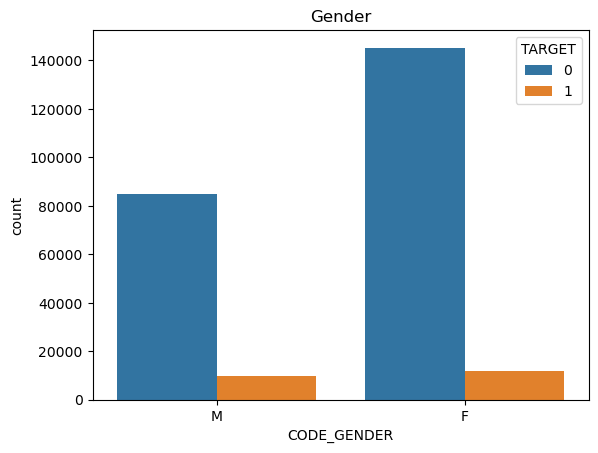

In [74]:
#univariate analysis
sns.countplot(x='CODE_GENDER', hue='TARGET', data=df1)
plt.title('Gender')
plt.show()

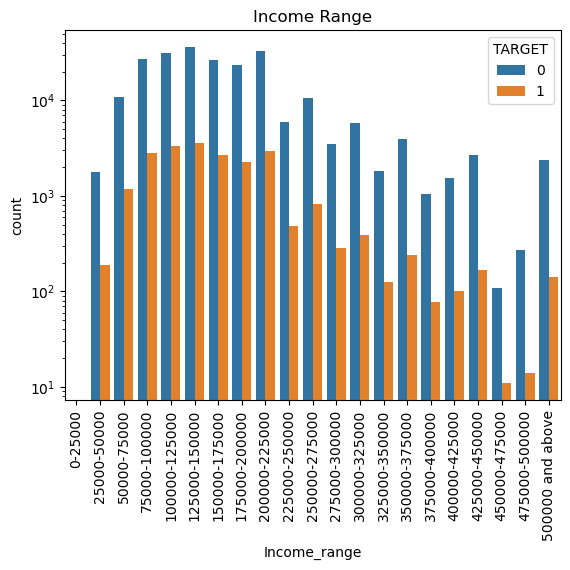

In [75]:
sns.countplot(x='Income_range', hue='TARGET', data=df1)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Income Range')
plt.show()

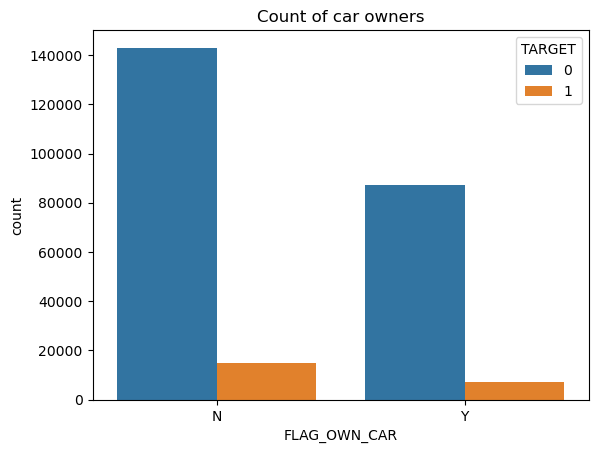

In [76]:
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=df1)
plt.title('Count of car owners')
plt.show()

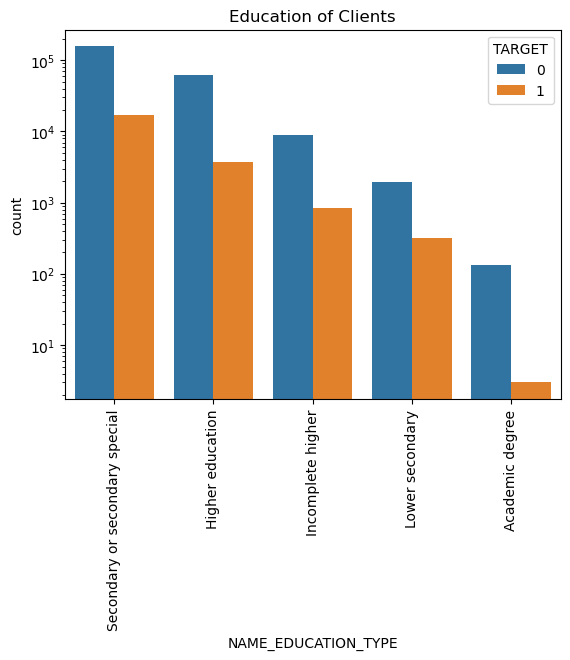

In [77]:
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=df1)
plt.title('Education of Clients')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

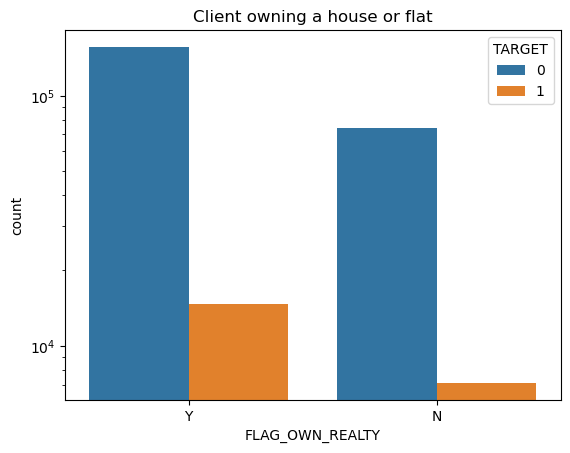

In [78]:
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=df1)
plt.title('Client owning a house or flat')
plt.yscale('log')
plt.show()

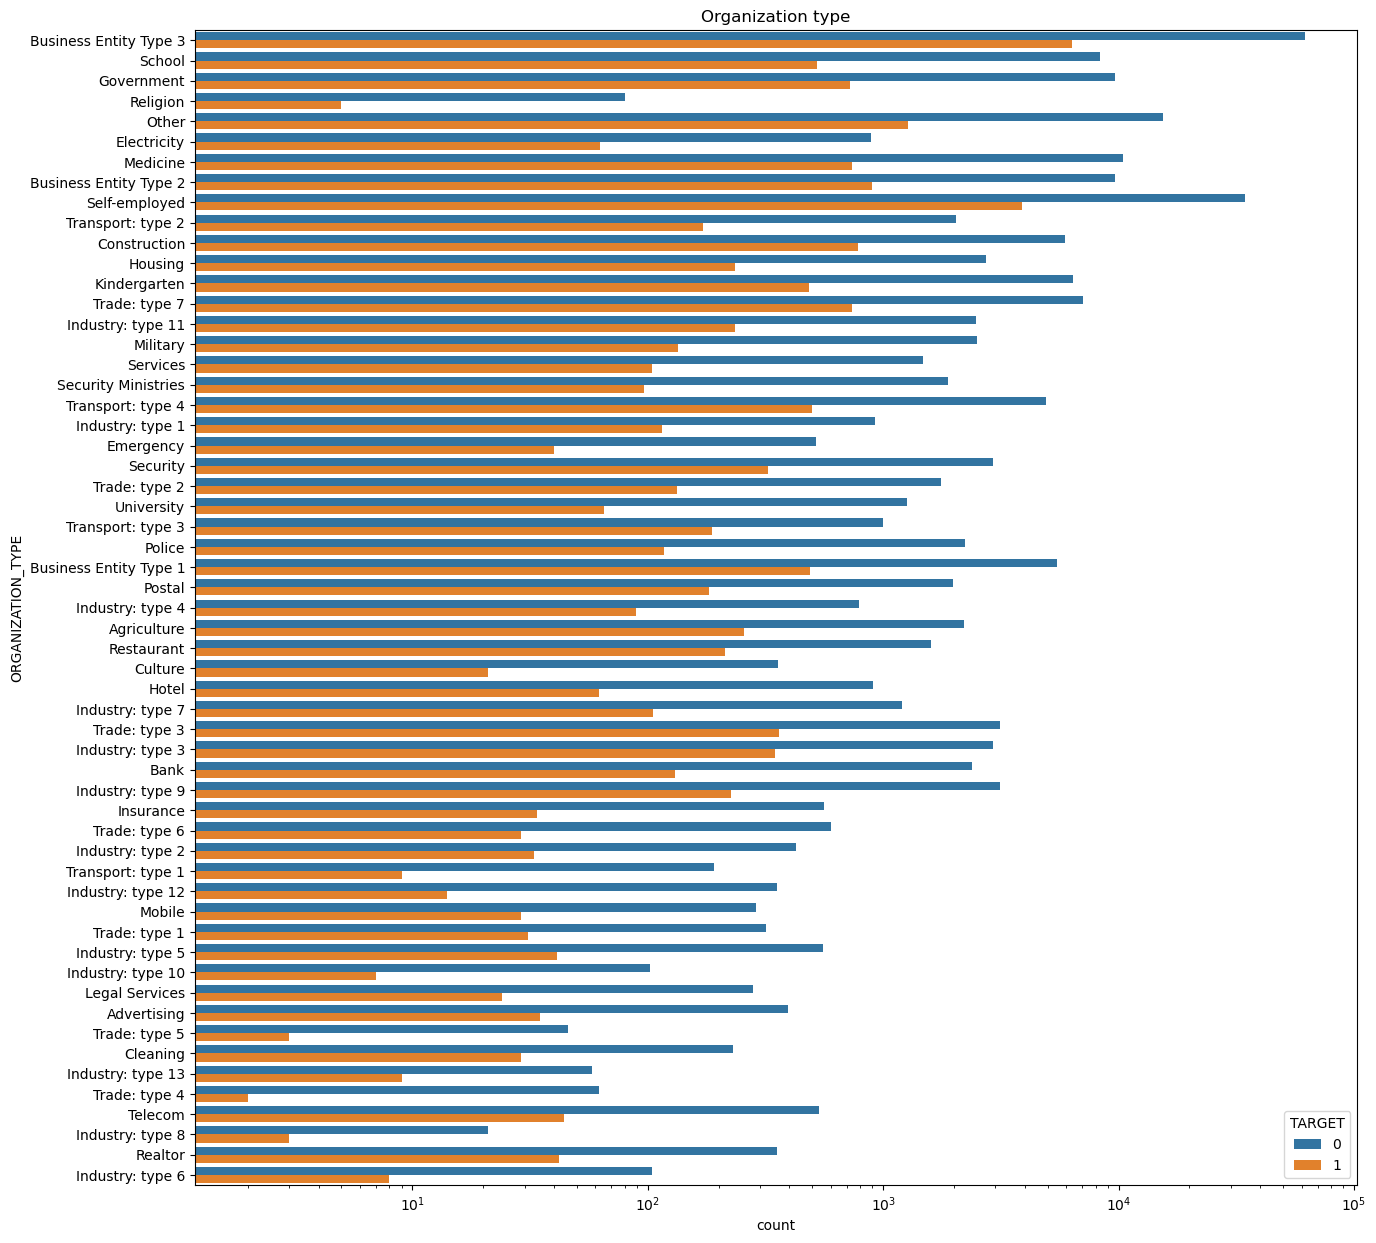

In [79]:
plt.figure(figsize=(15,15))
plt.xscale('log')
sns.countplot(y='ORGANIZATION_TYPE', hue='TARGET', data=df1)
plt.title('Organization type')
plt.show()

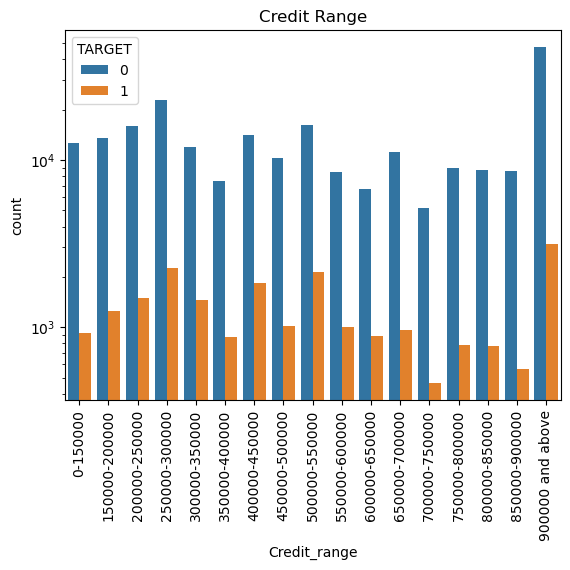

In [80]:
sns.countplot(x='Credit_range', hue='TARGET', data=df1)
plt.title('Credit Range')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

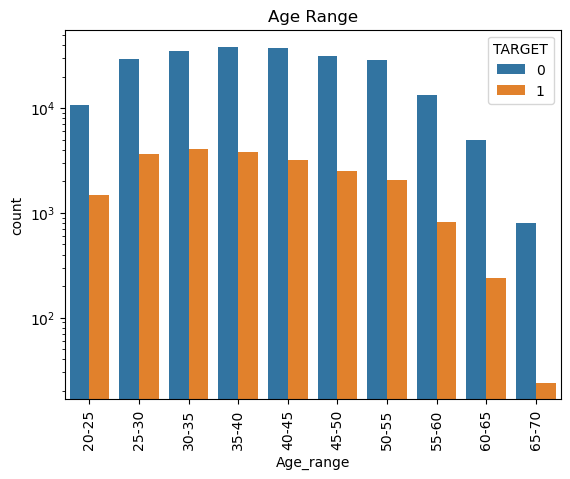

In [107]:
sns.countplot(x='Age_range', hue='TARGET', data=df1)
plt.title('Age Range')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

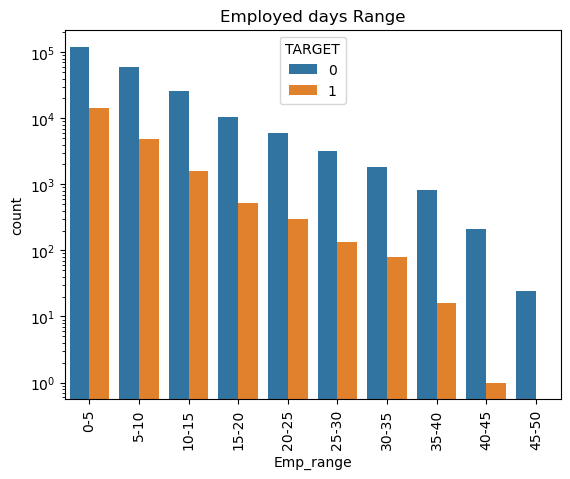

In [82]:
sns.countplot(x='Emp_range', hue='TARGET', data=df1)
plt.title('Employed days Range')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

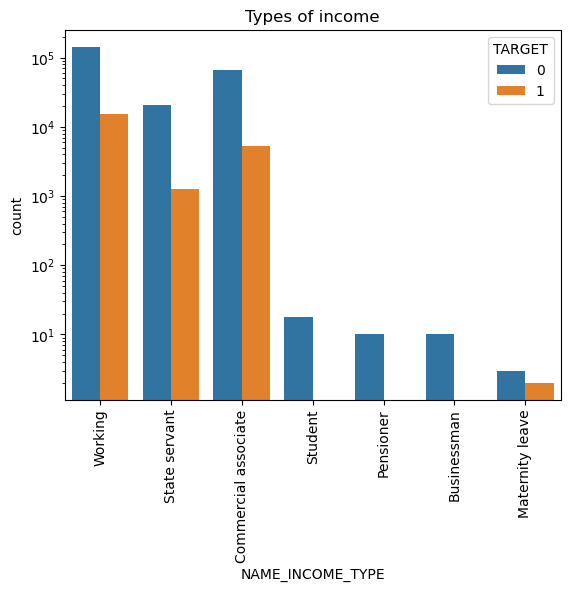

In [83]:
sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=df1)
plt.title('Types of income')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

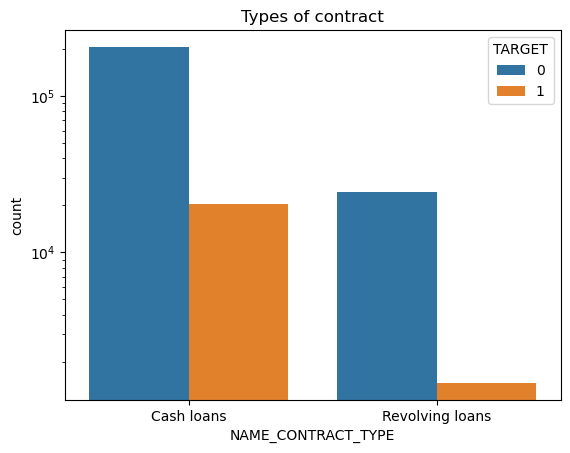

In [84]:
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=df1)
plt.title('Types of contract')
plt.yscale('log')
plt.show()

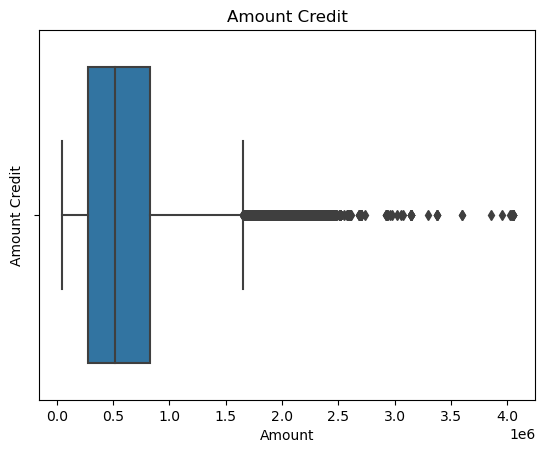

In [85]:
sns.boxplot(x='AMT_CREDIT', data=df1)
plt.title('Amount Credit')
plt.xlabel('Amount')
plt.ylabel('Amount Credit')
plt.show()

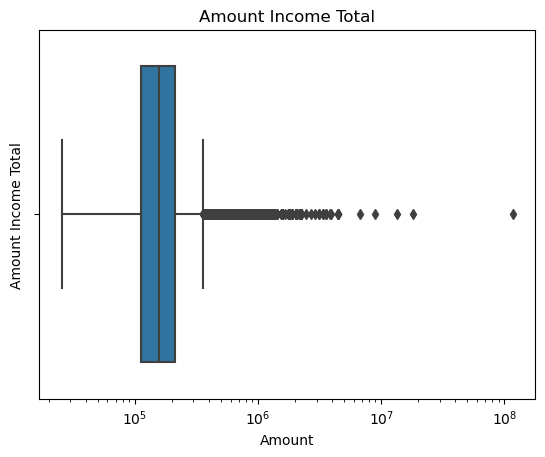

In [86]:
sns.boxplot(x='AMT_INCOME_TOTAL', data=df1)
plt.xlabel('Amount')
plt.xscale('log')
plt.ylabel('Amount Income Total')
plt.title('Amount Income Total')
plt.show()

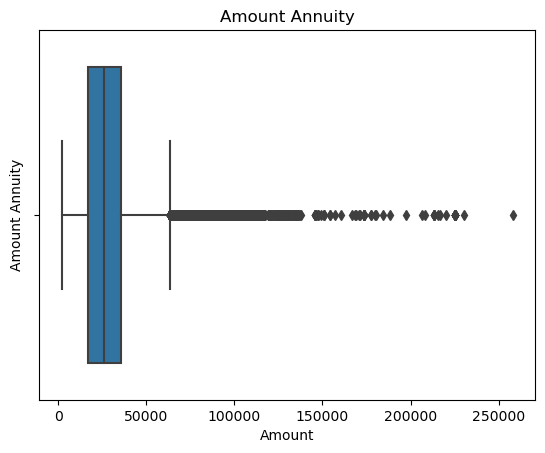

In [87]:
sns.boxplot(x='AMT_ANNUITY', data=df1)
plt.xlabel('Amount')
plt.ylabel('Amount Annuity')
plt.title('Amount Annuity')
plt.show()

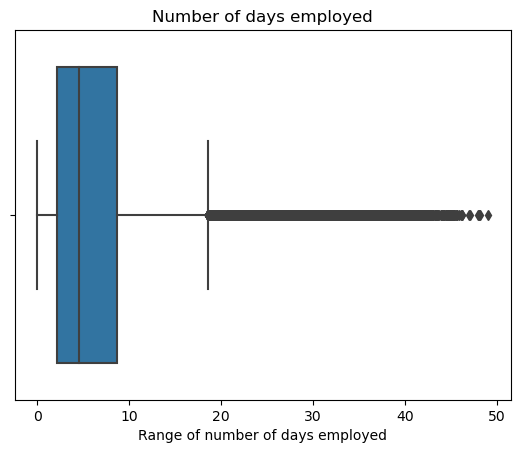

In [88]:
sns.boxplot(x='DAYS_EMPLOYED', data=df1)
plt.xlabel('Range of number of days employed')
plt.title('Number of days employed')
plt.show()

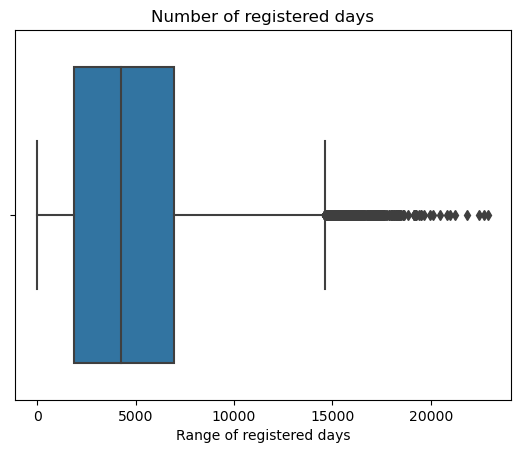

In [89]:
sns.boxplot(x='DAYS_REGISTRATION', data=df1)
plt.xlabel('Range of registered days')
plt.title('Number of registered days')
plt.show()

Text(0.5, 1.0, 'Count of children in the family')

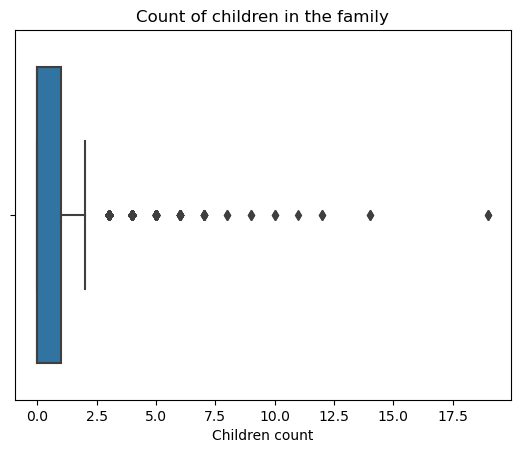

In [90]:
sns.boxplot(x='CNT_CHILDREN', data=df1)
plt.xlabel('Children count')
plt.title('Count of children in the family')

In [91]:
#removing outliers
df1=df1[~(df1.CNT_CHILDREN>=5)]

Text(0.5, 1.0, 'Count of children in the family')

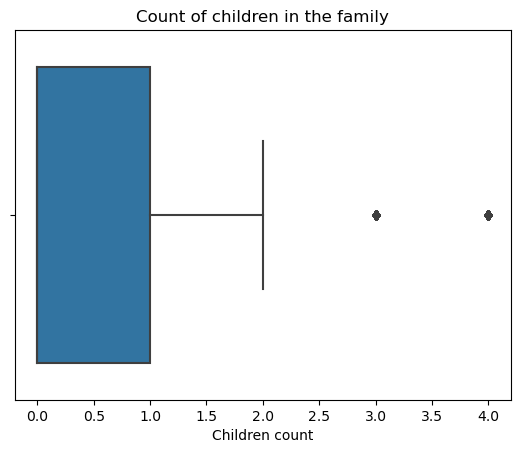

In [92]:
sns.boxplot(x='CNT_CHILDREN', data=df1)
plt.xlabel('Children count')
plt.title('Count of children in the family')

In [93]:
#dividing the data frame into two, tg1=client with payment difficulties and tg0=all other
tg0=df1.loc[df1['TARGET']==0]
tg1=df1.loc[df1['TARGET']==1]

In [94]:
tg0.shape

(230197, 46)

In [95]:
tg1.shape

(21820, 46)

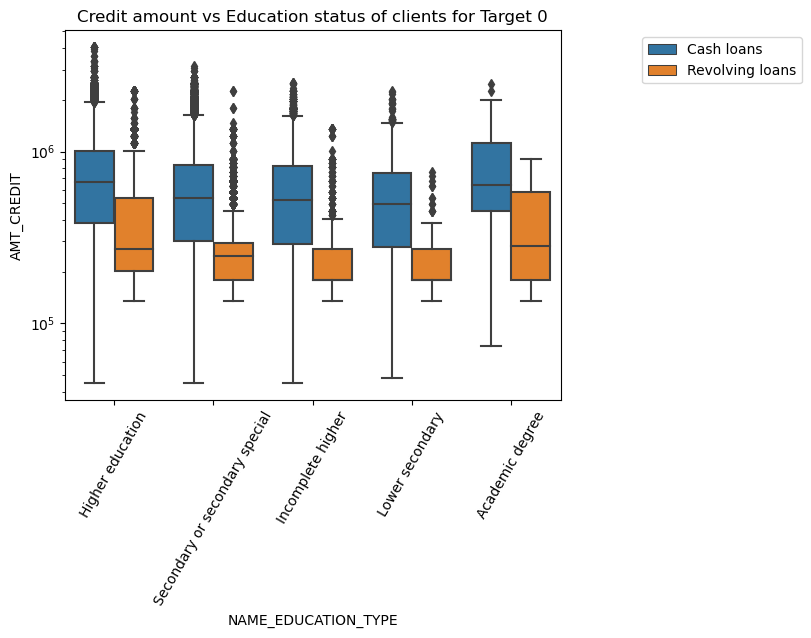

In [96]:
# bivariate analysis for target 0
sns.boxplot(x=tg0.NAME_EDUCATION_TYPE, y=tg0.AMT_CREDIT, hue=tg0.NAME_CONTRACT_TYPE, data=tg0)
plt.title('Credit amount vs Education status of clients for Target 0')
plt.xticks(rotation=60)
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1.0))
plt.yscale('log')
plt.show()

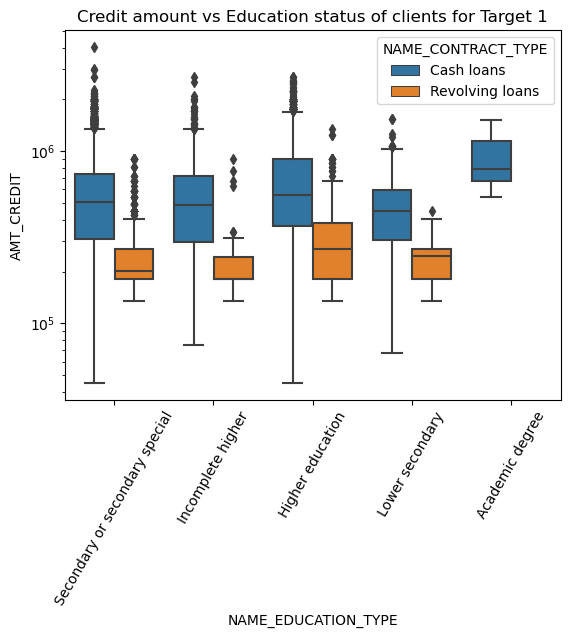

In [97]:
#for target 1
sns.boxplot(x=tg1.NAME_EDUCATION_TYPE, y=tg1.AMT_CREDIT, hue=tg1.NAME_CONTRACT_TYPE, data=tg1)
plt.title('Credit amount vs Education status of clients for Target 1')
plt.xticks(rotation=60)
plt.yscale('log')
plt.show()

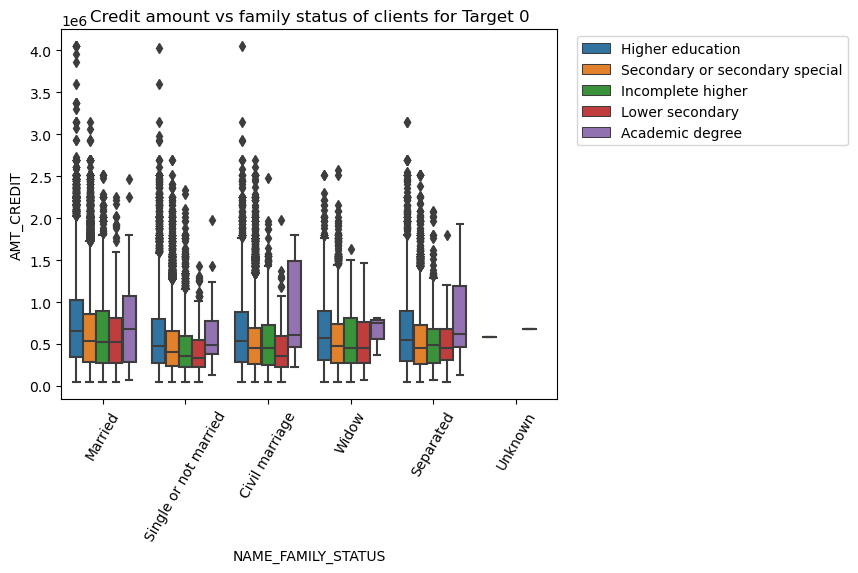

In [98]:
#for target 0
sns.boxplot(x=tg0.NAME_FAMILY_STATUS,y=tg0.AMT_CREDIT,hue=tg0.NAME_EDUCATION_TYPE, data=tg0)
plt.title('Credit amount vs family status of clients for Target 0')
plt.xticks(rotation=60)
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1.0))
plt.show()

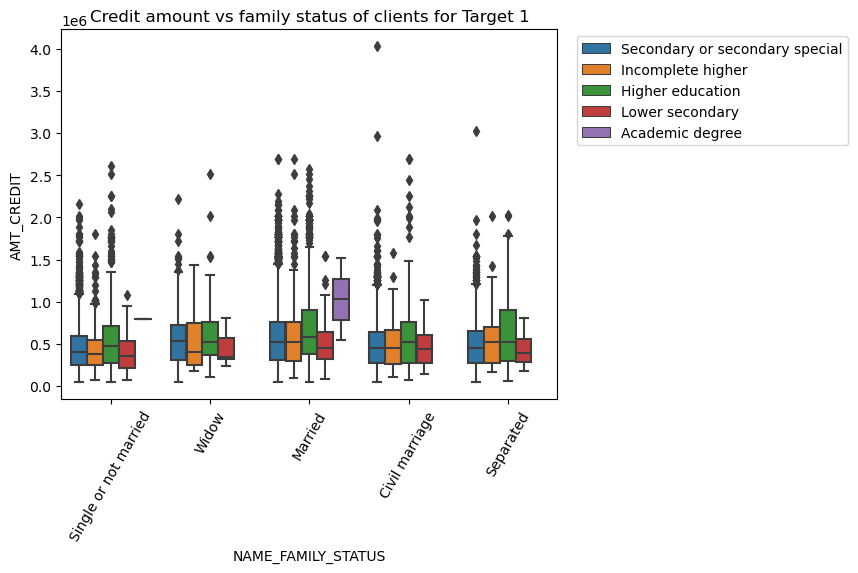

In [99]:
#for target 1
sns.boxplot(x=tg1.NAME_FAMILY_STATUS,y=tg1.AMT_CREDIT,hue=tg1.NAME_EDUCATION_TYPE, data=tg1)
plt.title('Credit amount vs family status of clients for Target 1')
plt.xticks(rotation=60)
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1.0))
plt.show()

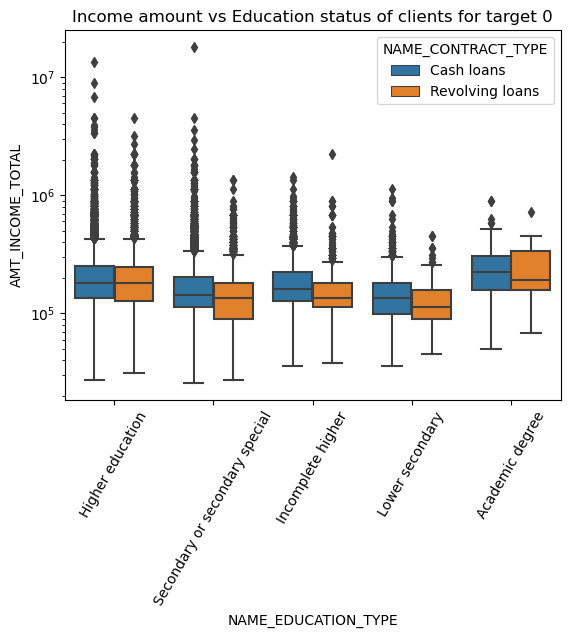

In [100]:
# for target 0
sns.boxplot(x=tg0.NAME_EDUCATION_TYPE, y=tg0.AMT_INCOME_TOTAL, hue=tg0.NAME_CONTRACT_TYPE, data=tg0)
plt.title('Income amount vs Education status of clients for target 0')
plt.xticks(rotation=60)
plt.yscale('log')
plt.show()

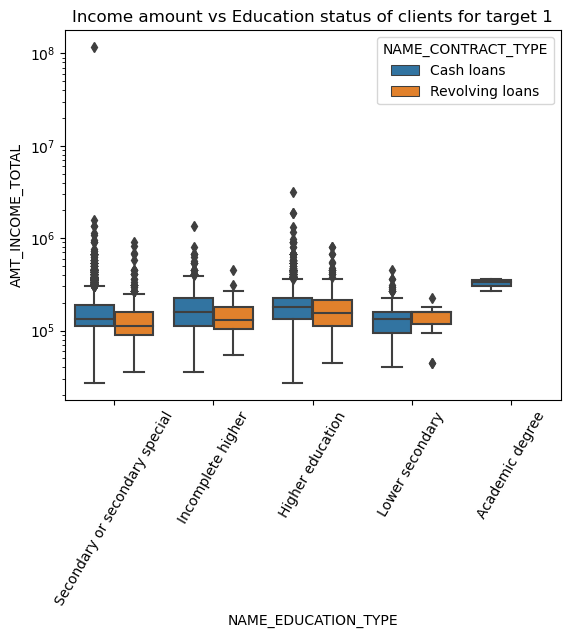

In [101]:
# for target 1
sns.boxplot(x=tg1.NAME_EDUCATION_TYPE, y=tg1.AMT_INCOME_TOTAL, hue=tg1.NAME_CONTRACT_TYPE, data=tg1)
plt.title('Income amount vs Education status of clients for target 1')
plt.xticks(rotation=60)
plt.yscale('log')
plt.show()

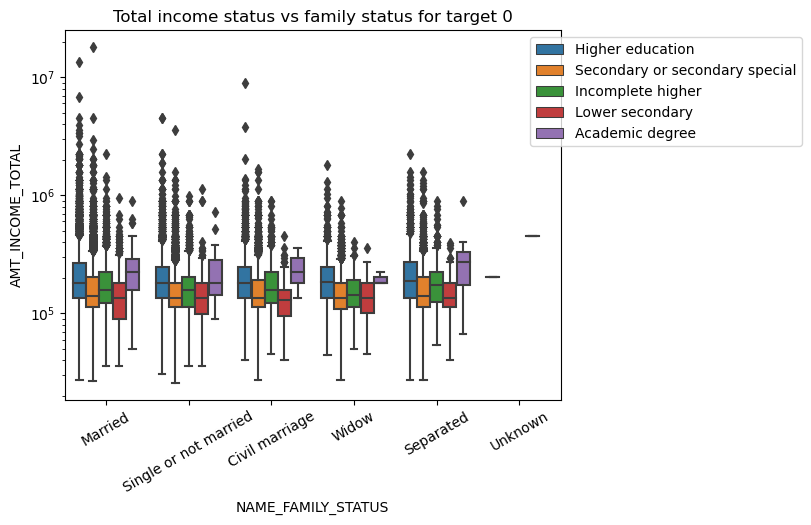

In [102]:
#for target 0
sns.boxplot(x=tg0.NAME_FAMILY_STATUS, y=tg0.AMT_INCOME_TOTAL, hue=tg0.NAME_EDUCATION_TYPE, data=tg0)
plt.title('Total income vs family status for target 0')
plt.yscale('log')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1.0))
plt.xticks(rotation=30)
plt.show()

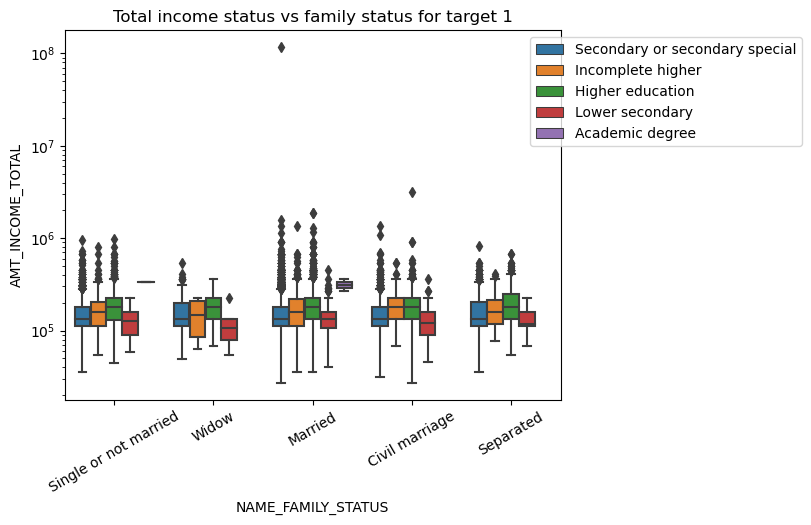

In [103]:
#for target 1
sns.boxplot(x=tg1.NAME_FAMILY_STATUS, y=tg1.AMT_INCOME_TOTAL, hue=tg1.NAME_EDUCATION_TYPE, data=tg1)
plt.title('Total income vs family status for target 1')
plt.yscale('log')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1.0))
plt.xticks(rotation=30)
plt.show()

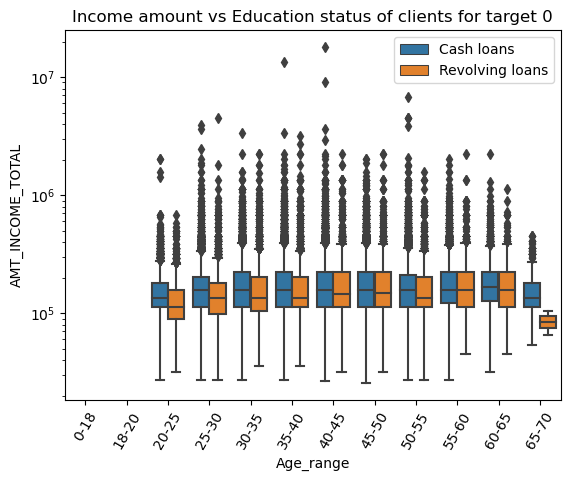

In [110]:
# for target 0
sns.boxplot(x=tg0.Age_range, y=tg0.AMT_INCOME_TOTAL, hue=tg0.NAME_CONTRACT_TYPE, data=tg0)
plt.title('Income amount vs clients age range for target 0')
plt.xticks(rotation=60)
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

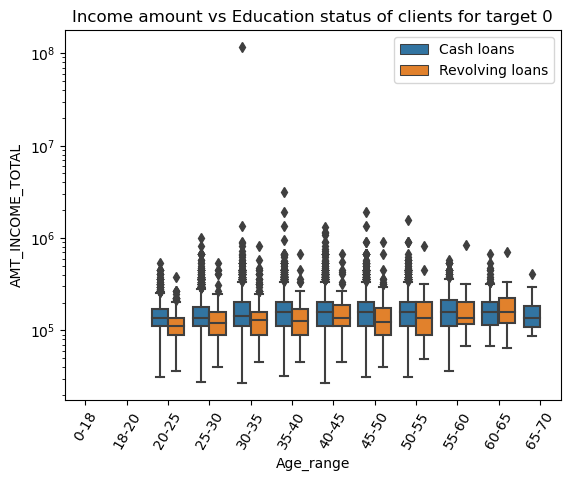

In [111]:
# for target 1
sns.boxplot(x=tg1.Age_range, y=tg1.AMT_INCOME_TOTAL, hue=tg1.NAME_CONTRACT_TYPE, data=tg1)
plt.title('Income amount vs clients age range for target 1')
plt.xticks(rotation=60)
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

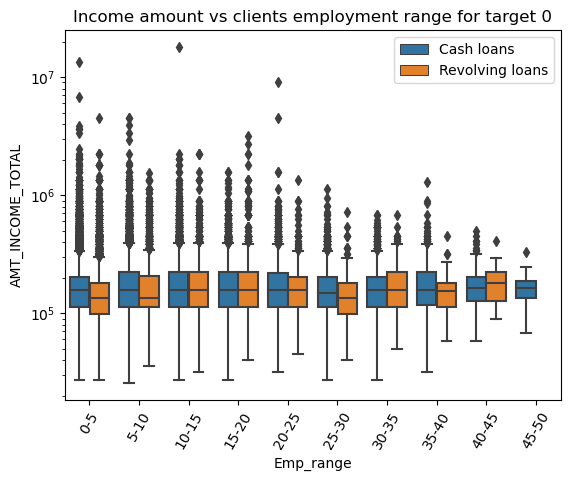

In [112]:
# for target 0
sns.boxplot(x=tg0.Emp_range, y=tg0.AMT_INCOME_TOTAL, hue=tg0.NAME_CONTRACT_TYPE, data=tg0)
plt.title('Income amount vs clients employed years range for target 0')
plt.xticks(rotation=60)
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

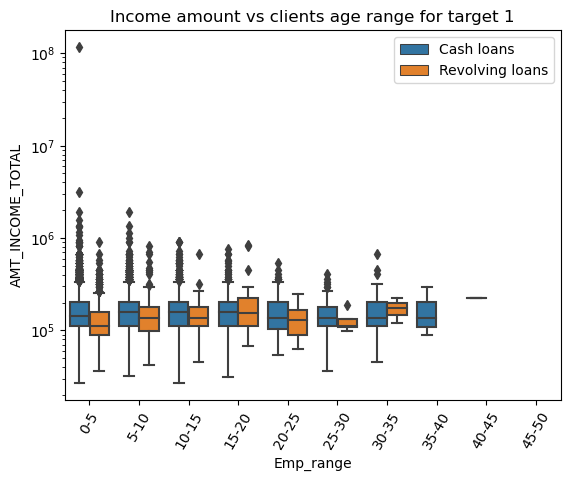

In [113]:
# for target 1
sns.boxplot(x=tg1.Emp_range, y=tg1.AMT_INCOME_TOTAL, hue=tg1.NAME_CONTRACT_TYPE, data=tg1)
plt.title('Income amount vs clients employed years range for target 1')
plt.xticks(rotation=60)
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#multivariate analysis

In [115]:
#correlation mattrix
corr_tg0=tg0.iloc[:,2:].corr()
corr_tg0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.009552,-0.018254,-0.007310,-0.021762,-0.030566,-0.245567,-0.063773,-0.164406,0.118825,...,0.019751,0.003165,0.019451,0.002105,-0.001519,0.000117,-0.001666,-0.021138,-0.002999,-0.032997
AMT_INCOME_TOTAL,-0.009552,1.000000,0.326157,0.400748,0.333319,0.169272,0.045476,0.030068,-0.034562,0.026494,...,-0.030661,-0.027929,-0.030477,-0.027416,0.001372,0.009162,0.006848,0.057180,0.012067,0.024962
AMT_CREDIT,-0.018254,0.326157,1.000000,0.762100,0.986727,0.103906,0.152612,0.087442,0.015143,0.034948,...,-0.003853,-0.022195,-0.003823,-0.024231,-0.004408,0.005324,-0.002946,0.052143,0.018494,-0.051724
AMT_ANNUITY,-0.007310,0.400748,0.762100,1.000000,0.766930,0.122203,0.091529,0.052422,-0.009815,0.026028,...,-0.016455,-0.023305,-0.016275,-0.024145,0.003762,0.003001,0.014213,0.034258,0.013763,-0.007375
AMT_GOODS_PRICE,-0.021762,0.333319,0.986727,0.766930,1.000000,0.107048,0.146791,0.088589,0.011813,0.036729,...,-0.004009,-0.023433,-0.004021,-0.025058,-0.003934,0.005703,-0.002378,0.053919,0.018966,-0.054654
REGION_POPULATION_RELATIVE,-0.030566,0.169272,0.103906,0.122203,0.107048,1.000000,0.041160,-0.008682,0.059654,0.004007,...,-0.013807,0.004957,-0.013285,0.000596,-0.001394,0.002214,-0.003697,0.081823,-0.001898,-0.002023
DAYS_BIRTH,-0.245567,0.045476,0.152612,0.091529,0.146791,0.041160,1.000000,0.352709,0.299000,0.108133,...,-0.019502,-0.015165,-0.019102,-0.015843,-0.001723,-0.002771,-0.000353,0.029266,0.001652,0.054051
DAYS_EMPLOYED,-0.063773,0.030068,0.087442,0.052422,0.088589,-0.008682,0.352709,1.000000,0.172083,0.086702,...,0.000666,-0.007427,0.000728,-0.009373,0.001317,-0.002626,-0.002901,0.023439,-0.005966,0.000796
DAYS_REGISTRATION,-0.164406,-0.034562,0.015143,-0.009815,0.011813,0.059654,0.299000,0.172083,1.000000,0.029945,...,-0.016289,-0.007884,-0.016102,-0.008120,0.002900,-0.000755,0.000402,0.021451,-0.002883,0.019151
DAYS_ID_PUBLISH,0.118825,0.026494,0.034948,0.026028,0.036729,0.004007,0.108133,0.086702,0.029945,1.000000,...,0.008698,-0.008715,0.009213,-0.010301,-0.004758,0.000707,0.002859,0.021381,0.002782,0.023082


Text(0.5, 1.0, 'correlation mattrix for target 0')

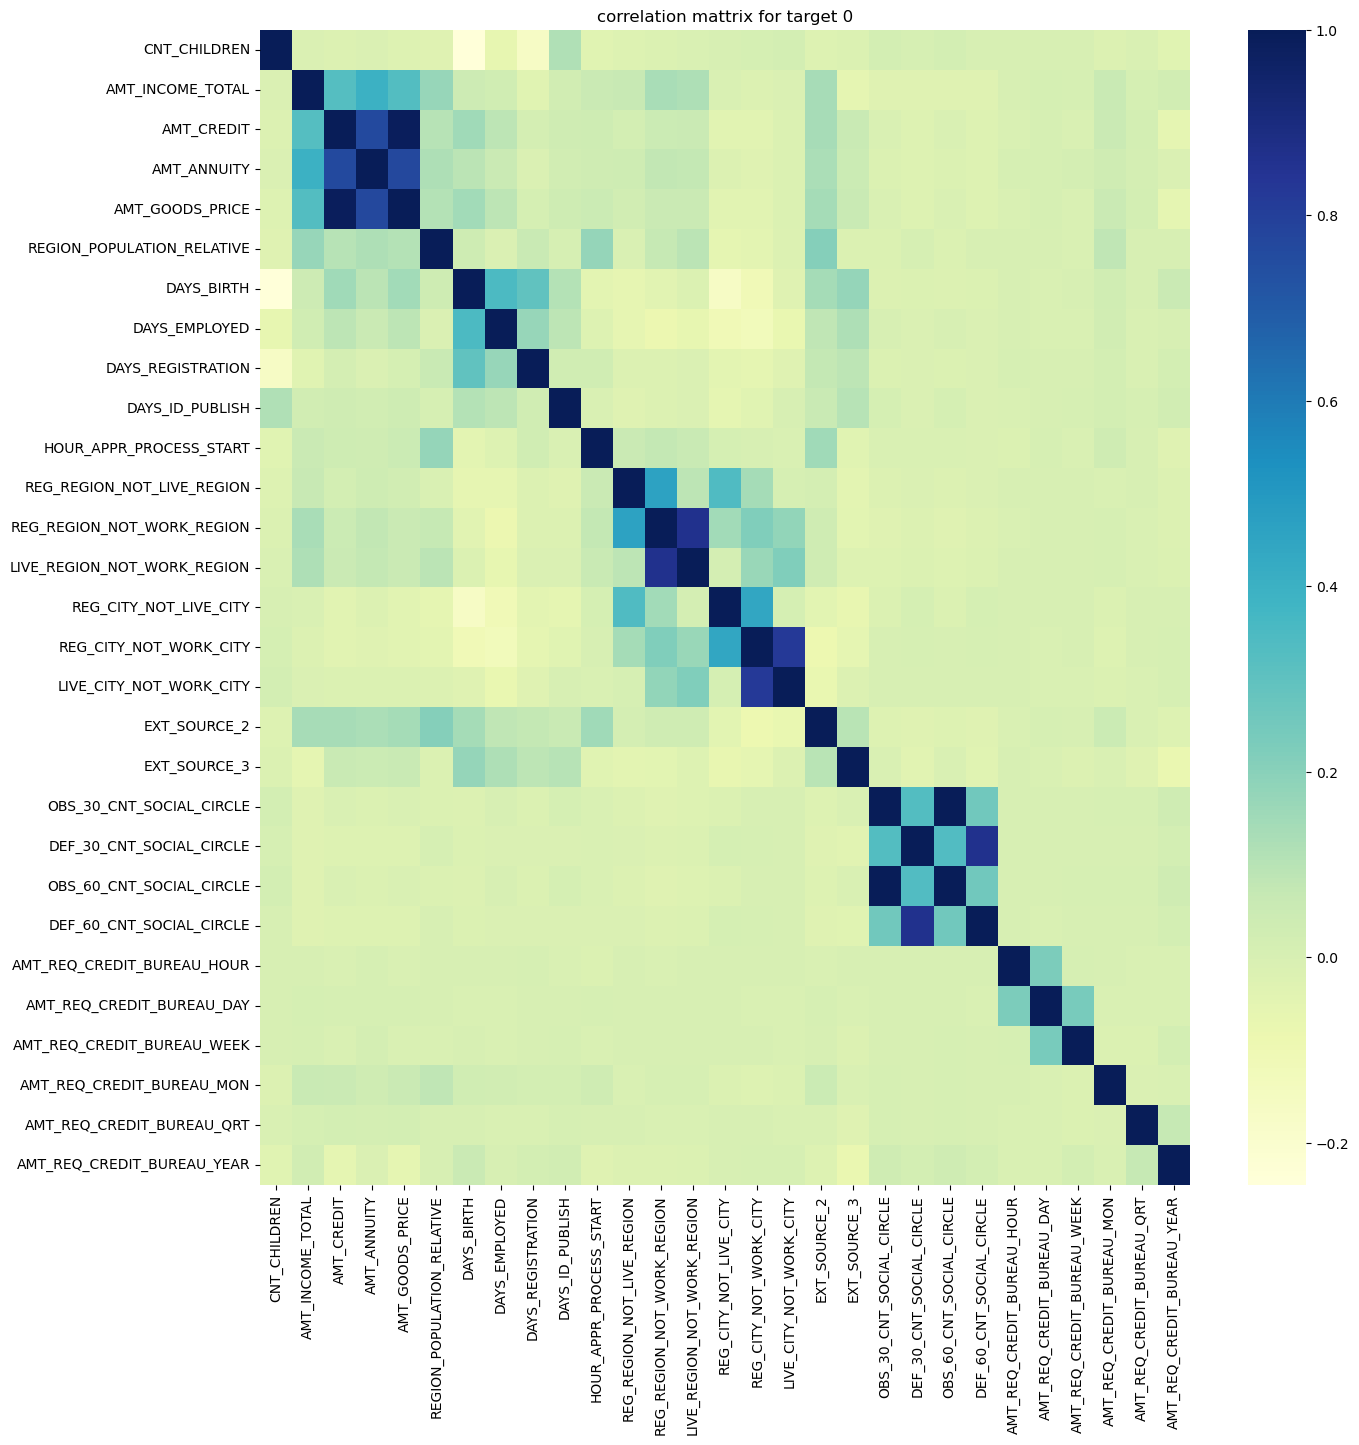

In [99]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_tg0, cmap="YlGnBu")
plt.title('correlation mattrix for target 0')

In [116]:
top10_other = corr_tg0.unstack().sort_values(kind='quicksort').drop_duplicates().nlargest(10)

In [117]:
top10_other

CNT_CHILDREN                CNT_CHILDREN                   1.000000
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998491
AMT_GOODS_PRICE             AMT_CREDIT                     0.986727
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.861431
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.860428
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.820781
AMT_GOODS_PRICE             AMT_ANNUITY                    0.766930
AMT_CREDIT                  AMT_ANNUITY                    0.762100
REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.461709
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY         0.442738
dtype: float64

In [118]:
corr_tg1=tg1.iloc[:,2:].corr()
corr_tg1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.001670,-0.001830,0.015176,-0.007726,-0.030167,-0.181540,-0.035506,-0.128269,0.091185,...,0.029426,0.001376,0.028613,-0.005957,-0.001772,-0.010051,-0.007691,-0.021737,-0.015192,-0.026874
AMT_INCOME_TOTAL,0.001670,1.000000,0.036508,0.043356,0.036120,0.008489,0.007802,0.000031,0.004014,0.008809,...,-0.005907,-0.005788,-0.005807,-0.005213,0.000508,-0.000454,0.000002,0.003441,-0.001485,0.000687
AMT_CREDIT,-0.001830,0.036508,1.000000,0.748769,0.982800,0.069213,0.189567,0.106266,0.033127,0.062686,...,0.015902,-0.031822,0.016387,-0.035116,-0.007761,-0.003076,0.009880,0.059325,-0.014823,-0.039175
AMT_ANNUITY,0.015176,0.043356,0.748769,1.000000,0.749432,0.074529,0.090519,0.049258,-0.014433,0.044438,...,0.000034,-0.024485,0.001269,-0.027749,0.011074,-0.002048,0.037423,0.055469,-0.005796,-0.010771
AMT_GOODS_PRICE,-0.007726,0.036120,0.982800,0.749432,1.000000,0.076289,0.185602,0.112201,0.031933,0.065000,...,0.016768,-0.027091,0.017323,-0.029607,-0.006806,-0.001196,0.011929,0.063237,-0.013598,-0.042626
REGION_POPULATION_RELATIVE,-0.030167,0.008489,0.069213,0.074529,0.076289,1.000000,0.049958,0.015754,0.055857,0.011885,...,0.004447,0.024008,0.004843,0.015528,0.000322,-0.001795,0.006846,0.072719,-0.006543,-0.002568
DAYS_BIRTH,-0.181540,0.007802,0.189567,0.090519,0.185602,0.049958,1.000000,0.307085,0.241116,0.135611,...,0.009025,-0.011155,0.009607,-0.012626,-0.013546,-0.002455,-0.003659,0.027934,0.010060,0.082742
DAYS_EMPLOYED,-0.035506,0.000031,0.106266,0.049258,0.112201,0.015754,0.307085,1.000000,0.137348,0.096599,...,0.031064,-0.000251,0.031008,-0.000026,-0.009855,0.006136,0.008529,0.022597,-0.019855,0.023305
DAYS_REGISTRATION,-0.128269,0.004014,0.033127,-0.014433,0.031933,0.055857,0.241116,0.137348,1.000000,0.050212,...,-0.014666,-0.013790,-0.014995,-0.011586,0.003191,-0.000608,-0.008106,0.000054,0.008771,0.015894
DAYS_ID_PUBLISH,0.091185,0.008809,0.062686,0.044438,0.065000,0.011885,0.135611,0.096599,0.050212,1.000000,...,0.019919,-0.013343,0.019697,-0.010488,-0.003836,0.013509,-0.003475,0.021098,-0.012872,0.039712


Text(0.5, 1.0, 'correlation mattrix for target 1')

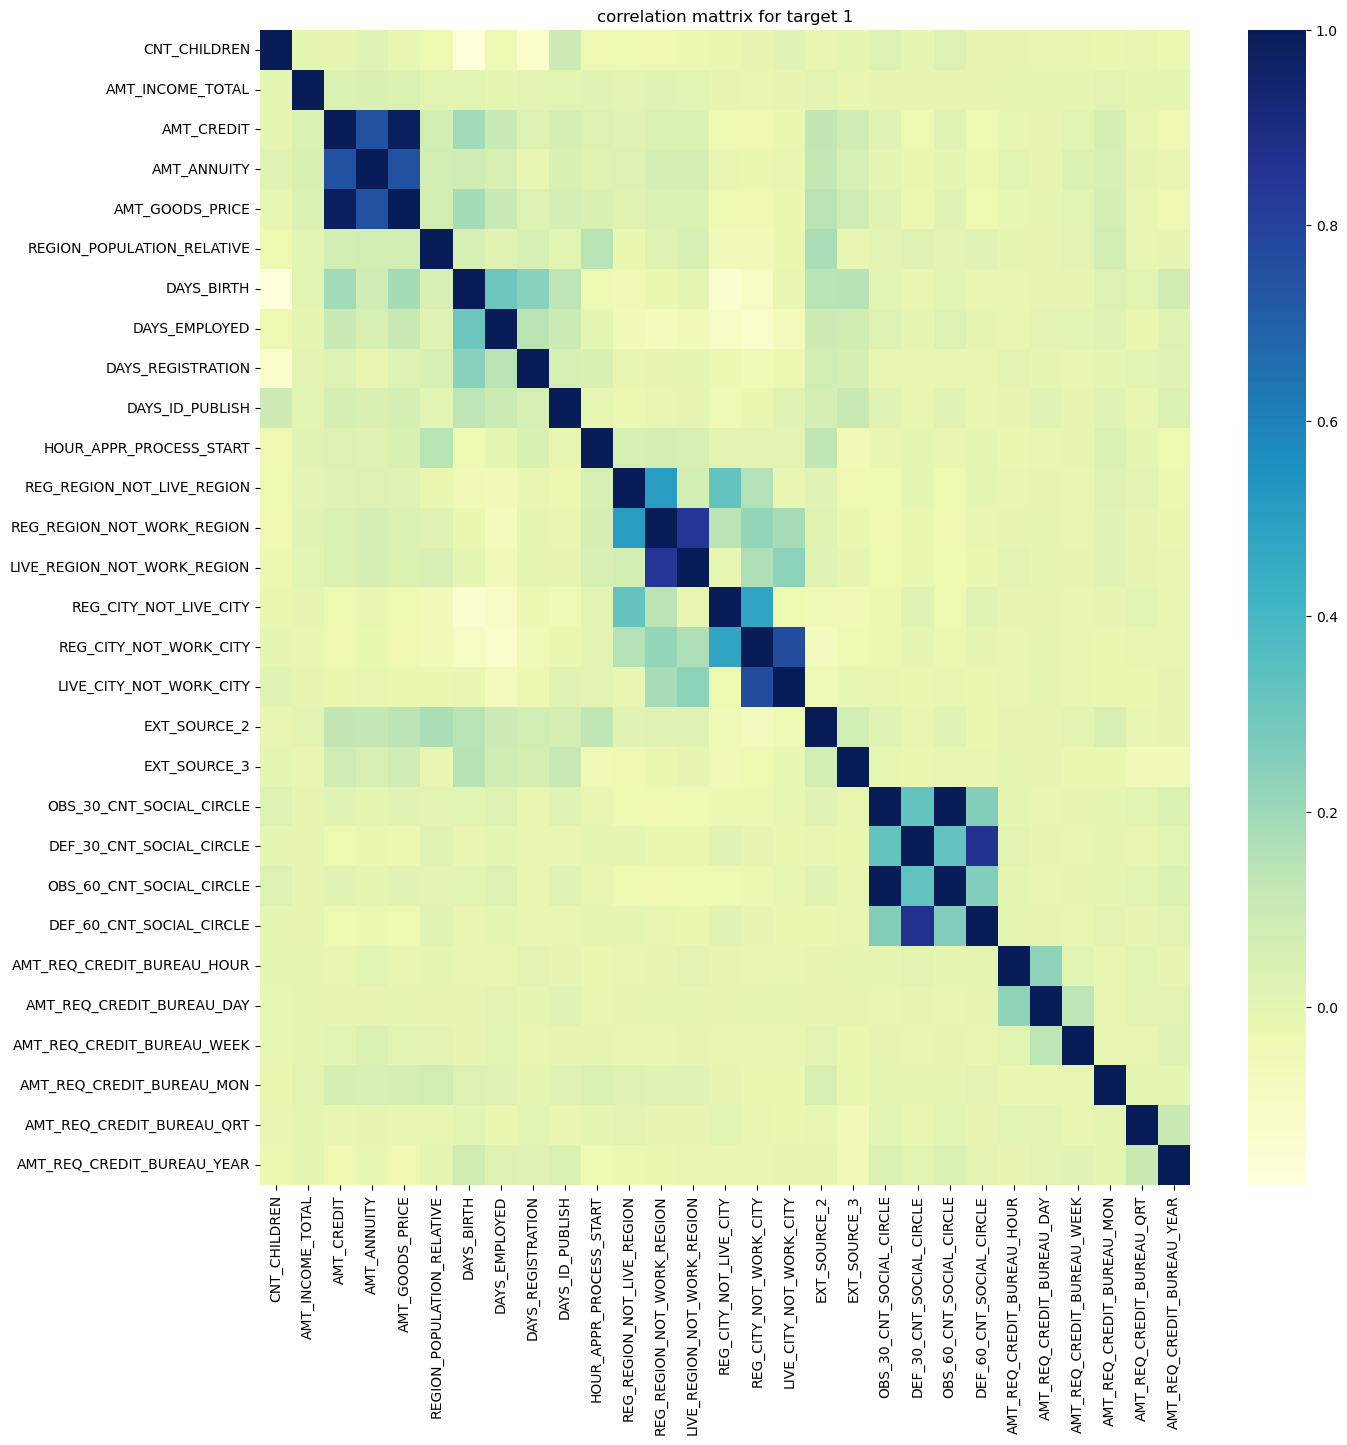

In [119]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_tg1, cmap="YlGnBu")
plt.title('correlation mattrix for target 1')

In [120]:
top10_difficulties = corr_tg1.unstack().sort_values(kind='quicksort').drop_duplicates().nlargest(10)
top10_difficulties

CNT_CHILDREN                CNT_CHILDREN                   1.000000
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE       0.998287
AMT_CREDIT                  AMT_GOODS_PRICE                0.982800
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.867575
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.846866
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.768170
AMT_GOODS_PRICE             AMT_ANNUITY                    0.749432
AMT_ANNUITY                 AMT_CREDIT                     0.748769
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     0.506738
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY         0.478381
dtype: float64

In [121]:
#Merging the 2 data frames together
merged_df=pd.merge(df,df1,on='SK_ID_CURR')
merged_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_range,Credit_range,Age_range,Emp_range
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,200000-225000,500000-550000,35-40,20-25
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,1800000.0,SATURDAY,18,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,200000-225000,500000-550000,35-40,20-25
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,108400.5,SUNDAY,14,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,200000-225000,500000-550000,35-40,20-25
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,75000-100000,0-150000,55-60,0-5
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,450000.0,WEDNESDAY,9,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,75000-100000,0-150000,55-60,0-5


In [122]:
merged_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,HOUR_APPR_PROCESS_START_x,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,1.139569e+06,1.139569e+06,895937.000000,1.139569e+06,1.139569e+06,8.872050e+05,1.139569e+06,1.139569e+06,1.139569e+06,1.139569e+06,...,1.137000e+06,1.137000e+06,1.137000e+06,1.137000e+06,1.008623e+06,1.008623e+06,1.008623e+06,1.008623e+06,1.008623e+06,1.008623e+06
mean,1.922489e+06,2.784476e+05,15872.869428,1.737989e+05,1.956743e+05,2.232729e+05,1.265603e+01,9.963451e-01,-8.858683e+02,3.238485e+02,...,1.541703e+00,1.505084e-01,1.523669e+00,1.054380e-01,6.396840e-03,6.942138e-03,3.859321e-02,3.188426e-01,3.516299e-01,2.809331e+00
std,5.326776e+05,1.028303e+05,14996.070367,2.967322e+05,3.229868e+05,3.194929e+05,3.359933e+00,6.034514e-02,7.834155e+02,6.684223e+03,...,2.527211e+00,4.599664e-01,2.505034e+00,3.732207e-01,8.328816e-02,1.103737e-01,2.119865e-01,1.010346e+00,9.586586e-01,2.141331e+00
min,1.000001e+06,1.000020e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.461174e+06,1.893000e+05,6135.525000,2.065500e+04,2.578050e+04,4.806000e+04,1.000000e+01,1.000000e+00,-1.322000e+03,-1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.922143e+06,2.788420e+05,11073.150000,6.880500e+04,7.864200e+04,1.049580e+05,1.300000e+01,1.000000e+00,-5.910000e+02,1.000000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,2.383628e+06,3.676110e+05,20470.185000,1.800000e+05,2.047320e+05,2.250000e+05,1.500000e+01,1.000000e+00,-2.760000e+02,9.500000e+01,...,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
max,2.845381e+06,4.562550e+05,418058.145000,5.850000e+06,4.509688e+06,5.850000e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,...,3.480000e+02,3.400000e+01,3.440000e+02,2.400000e+01,4.000000e+00,9.000000e+00,8.000000e+00,2.700000e+01,2.610000e+02,2.300000e+01


In [123]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139569 entries, 0 to 1139568
Data columns (total 71 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_PREV                    1139569 non-null  int64   
 1   SK_ID_CURR                    1139569 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1139569 non-null  object  
 3   AMT_ANNUITY_x                 895937 non-null   float64 
 4   AMT_APPLICATION               1139569 non-null  float64 
 5   AMT_CREDIT_x                  1139569 non-null  float64 
 6   AMT_GOODS_PRICE_x             887205 non-null   float64 
 7   WEEKDAY_APPR_PROCESS_START_x  1139569 non-null  object  
 8   HOUR_APPR_PROCESS_START_x     1139569 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT   1139569 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY        1139569 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE        1139569 non-null  object  
 12  NAME_CONTRACT_

In [124]:
non_relevant=['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_y',
              'HOUR_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
merged_df=merged_df.drop(non_relevant, axis=1)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139569 entries, 0 to 1139568
Data columns (total 60 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_PREV                    1139569 non-null  int64   
 1   NAME_CONTRACT_TYPE_x          1139569 non-null  object  
 2   AMT_ANNUITY_x                 895937 non-null   float64 
 3   AMT_APPLICATION               1139569 non-null  float64 
 4   AMT_CREDIT_x                  1139569 non-null  float64 
 5   AMT_GOODS_PRICE_x             887205 non-null   float64 
 6   WEEKDAY_APPR_PROCESS_START_x  1139569 non-null  object  
 7   HOUR_APPR_PROCESS_START_x     1139569 non-null  int64   
 8   NAME_CASH_LOAN_PURPOSE        1139569 non-null  object  
 9   NAME_CONTRACT_STATUS          1139569 non-null  object  
 10  DAYS_DECISION                 1139569 non-null  int64   
 11  NAME_PAYMENT_TYPE             1139569 non-null  object  
 12  CODE_REJECT_RE

In [125]:
merged_df.isnull().mean()*100

SK_ID_PREV                       0.000000
NAME_CONTRACT_TYPE_x             0.000000
AMT_ANNUITY_x                   21.379311
AMT_APPLICATION                  0.000000
AMT_CREDIT_x                     0.000000
AMT_GOODS_PRICE_x               22.145566
WEEKDAY_APPR_PROCESS_START_x     0.000000
HOUR_APPR_PROCESS_START_x        0.000000
NAME_CASH_LOAN_PURPOSE           0.000000
NAME_CONTRACT_STATUS             0.000000
DAYS_DECISION                    0.000000
NAME_PAYMENT_TYPE                0.000000
CODE_REJECT_REASON               0.000000
NAME_CLIENT_TYPE                 0.000000
NAME_GOODS_CATEGORY              0.000000
NAME_PORTFOLIO                   0.000000
NAME_PRODUCT_TYPE                0.000000
CHANNEL_TYPE                     0.000000
SELLERPLACE_AREA                 0.000000
NAME_SELLER_INDUSTRY             0.000000
CNT_PAYMENT                     21.378960
NAME_YIELD_GROUP                 0.000000
PRODUCT_COMBINATION              0.025711
TARGET                           0

In [ ]:
# Univariate analysis on merged data frame

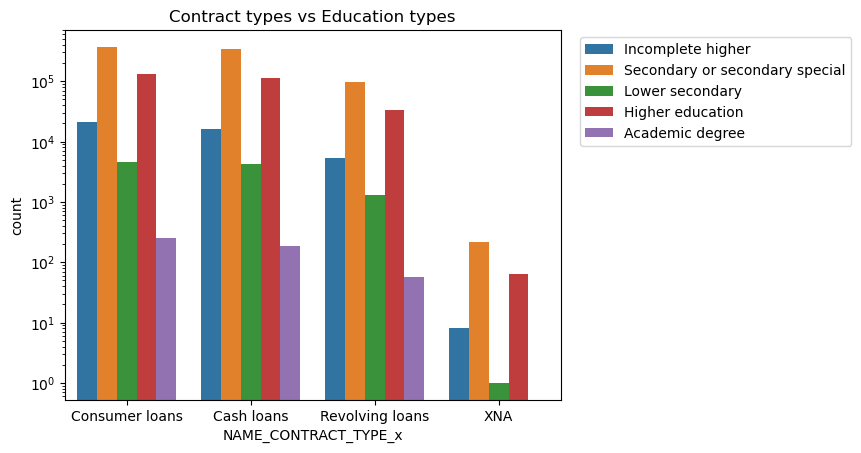

In [126]:
#Contract types vs education types
sns.countplot(x=merged_df.NAME_CONTRACT_TYPE_x, hue=merged_df.NAME_EDUCATION_TYPE, data=merged_df)
plt.title('Contract types vs Education types')
plt.yscale('log')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1.0))

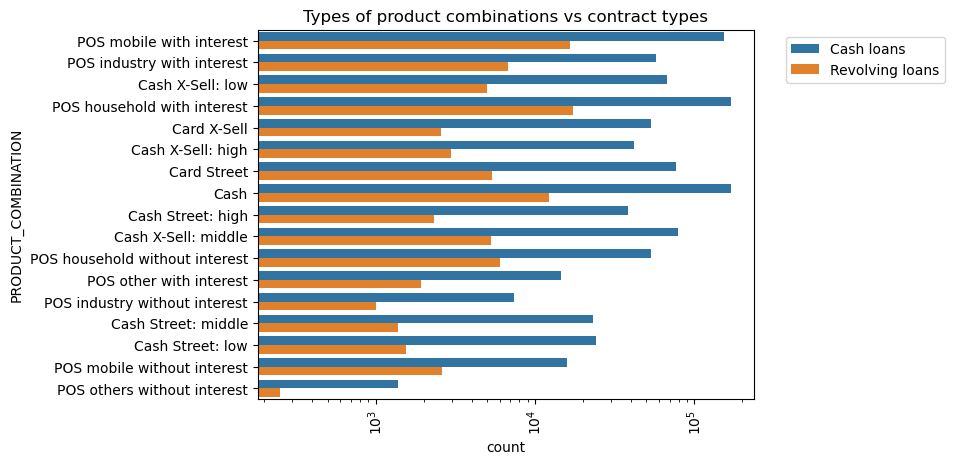

In [127]:
sns.countplot(y=merged_df.PRODUCT_COMBINATION, hue=merged_df.NAME_CONTRACT_TYPE_y)
plt.title('Types of product combinations vs contract types')
plt.xscale('log')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.4,1.0))

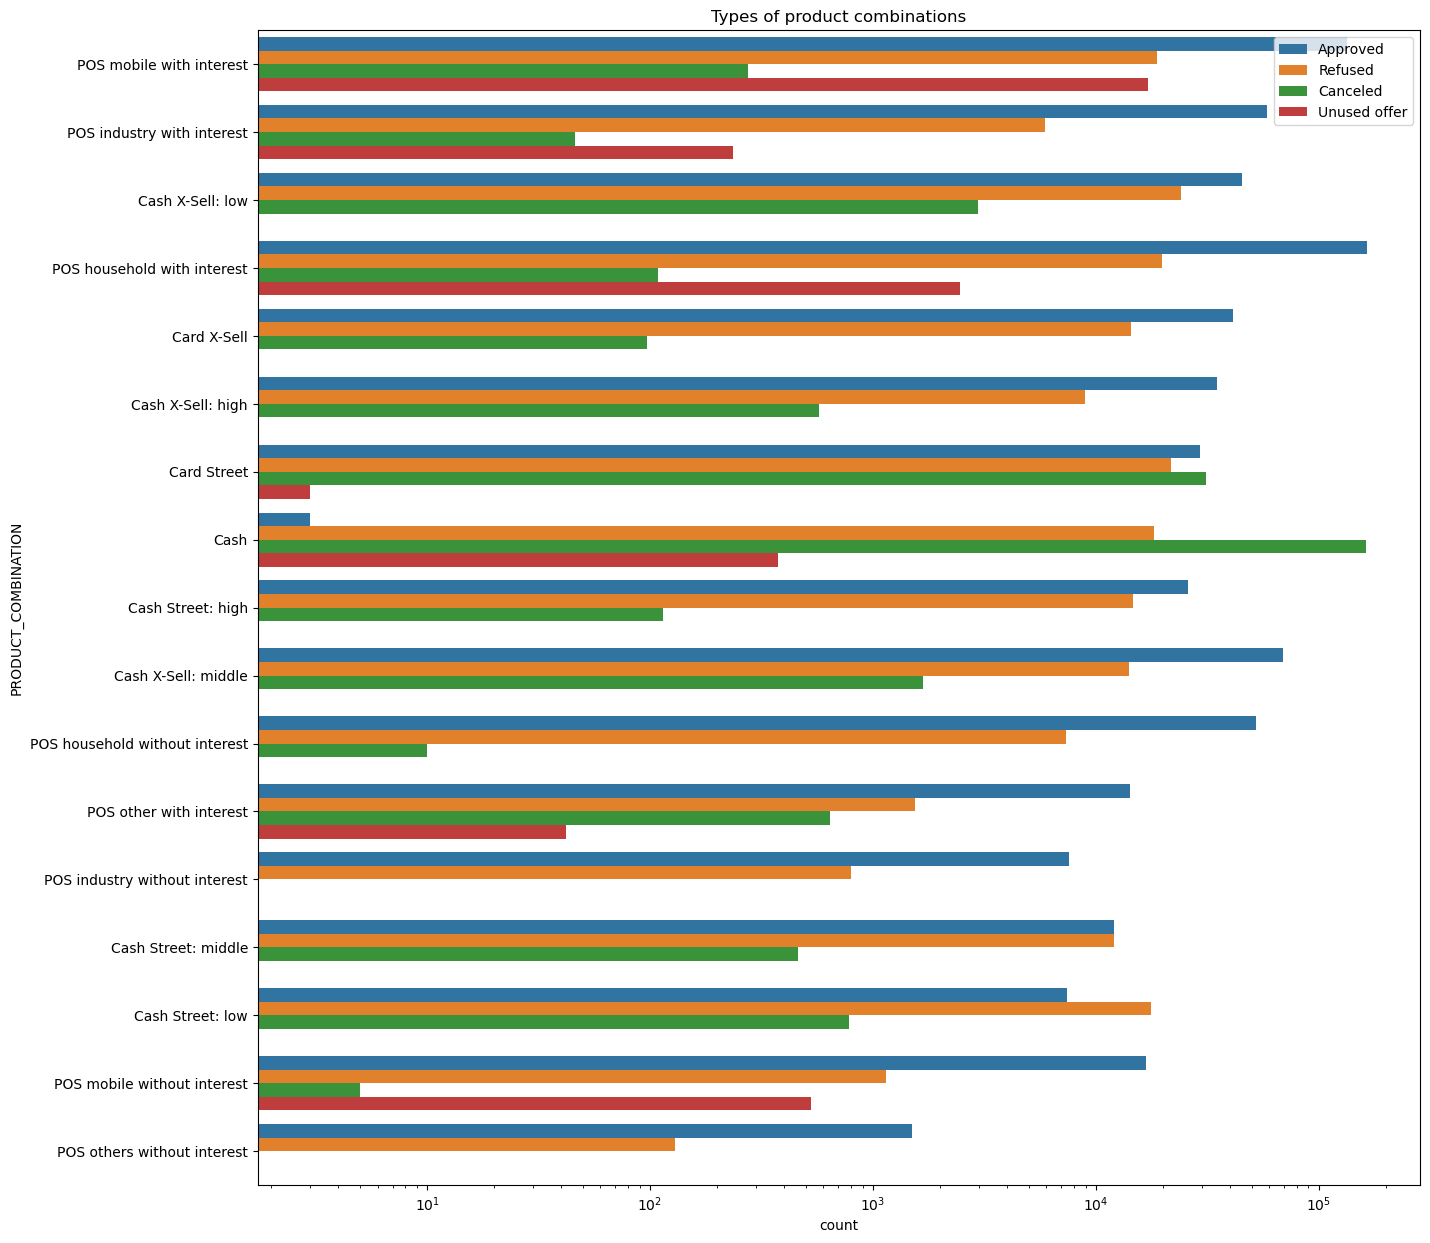

In [128]:
plt.figure(figsize=(15,15))
sns.countplot(y=merged_df.PRODUCT_COMBINATION, hue=merged_df.NAME_CONTRACT_STATUS)
plt.title('Types of product combinations')
plt.xscale('log')
plt.legend(loc='upper right')

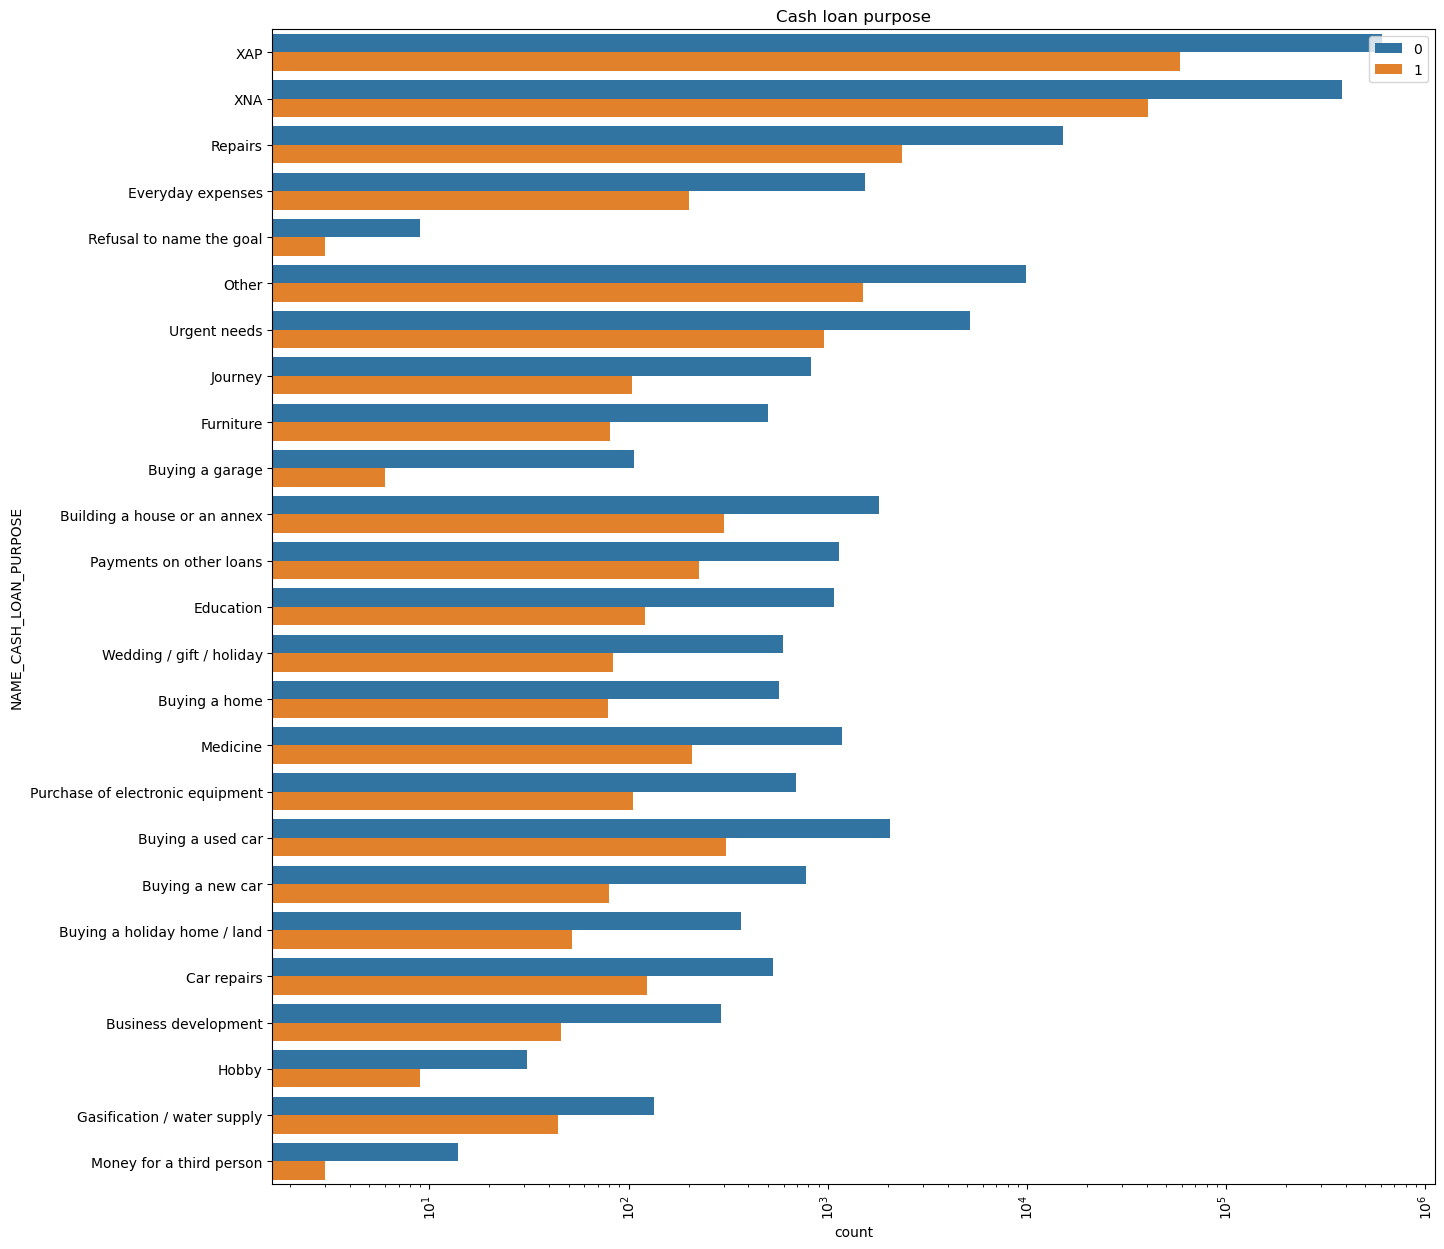

In [129]:
plt.figure(figsize=(15,15))
sns.countplot(y=merged_df.NAME_CASH_LOAN_PURPOSE, hue=merged_df.TARGET)
plt.title('Cash loan purpose')
plt.xscale('log')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

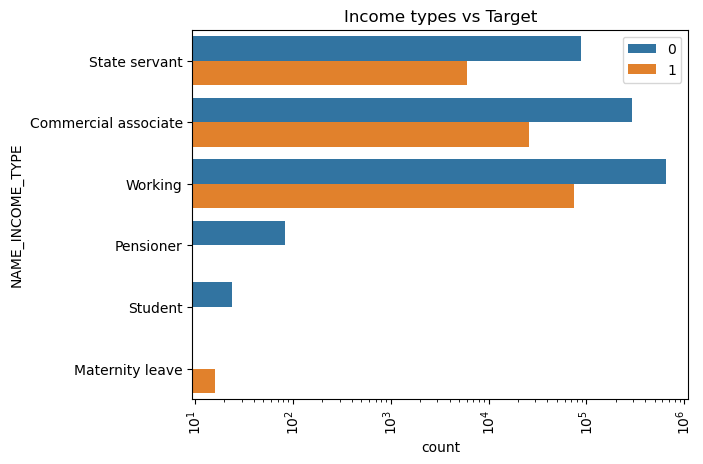

In [130]:
sns.countplot(y=merged_df.NAME_INCOME_TYPE, hue=merged_df.TARGET)
plt.title('Income types vs Target')
plt.xscale('log')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

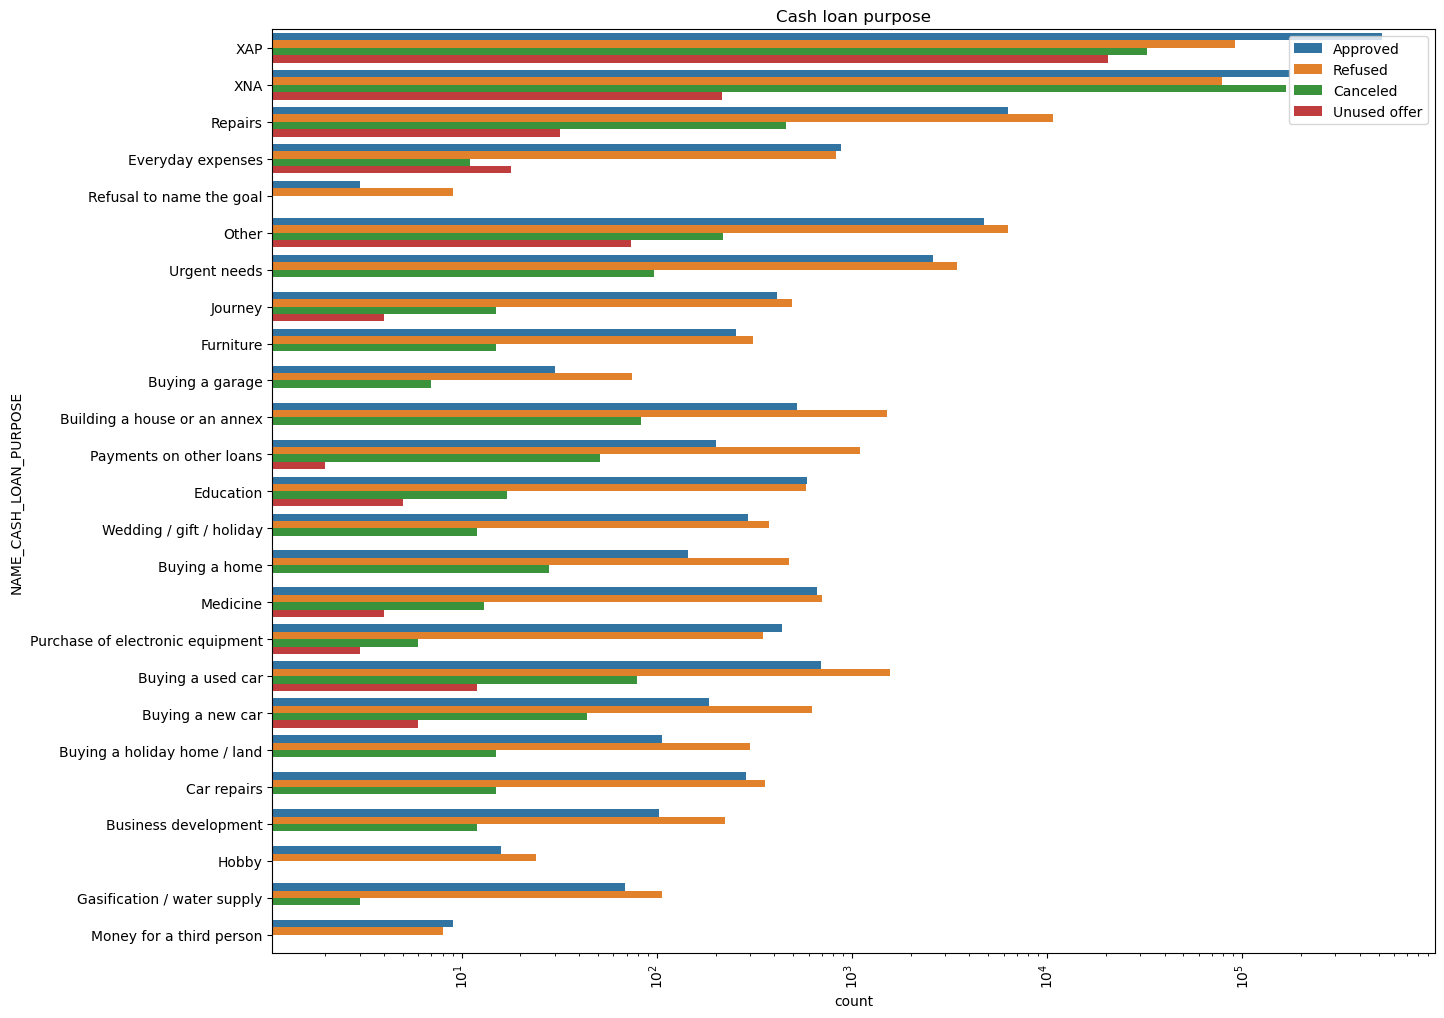

In [131]:
plt.figure(figsize=(15,12))
sns.countplot(y=merged_df.NAME_CASH_LOAN_PURPOSE, hue=merged_df.NAME_CONTRACT_STATUS)
plt.title('Cash loan purpose')
plt.xscale('log')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

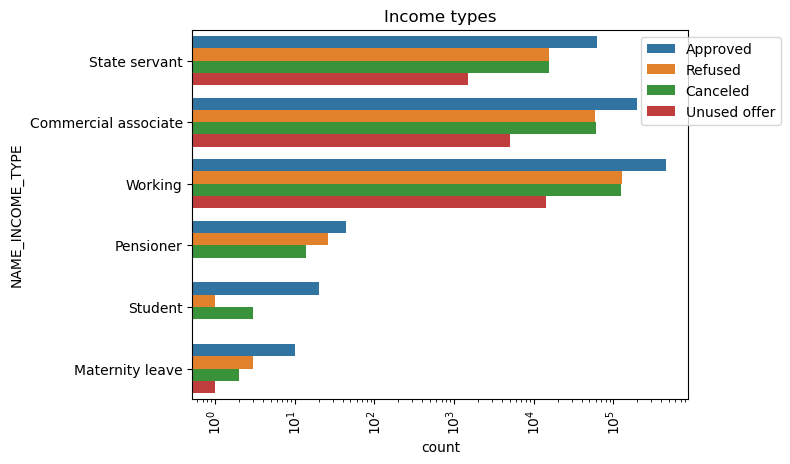

In [132]:
sns.countplot(y=merged_df.NAME_INCOME_TYPE, hue=merged_df.NAME_CONTRACT_STATUS)
plt.title('Income types')
plt.xscale('log')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1.0))

In [ ]:
#Bivariate analysis on the merged data frame

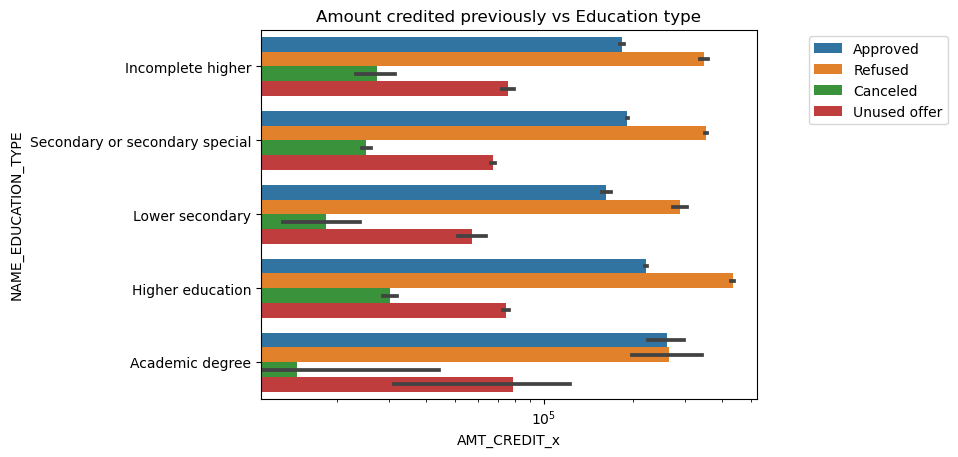

In [133]:
sns.barplot(x=merged_df.AMT_CREDIT_x, y=merged_df.NAME_EDUCATION_TYPE, hue=merged_df.NAME_CONTRACT_STATUS, data=merged_df)
plt.xscale('log')
plt.title('Amount credited previously vs Education type')
plt.legend(loc='upper right', bbox_to_anchor=(1.4,1.0))
plt.show()

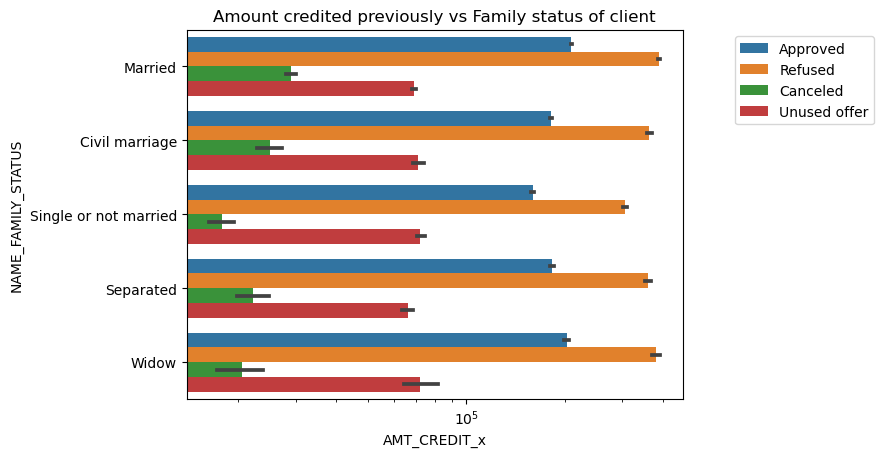

In [134]:
sns.barplot(x=merged_df.AMT_CREDIT_x, y=merged_df.NAME_FAMILY_STATUS, hue=merged_df.NAME_CONTRACT_STATUS, data=merged_df)
plt.xscale('log')
plt.title('Amount credited previously vs Family status of client')
plt.legend(loc='upper right', bbox_to_anchor=(1.4,1.0))

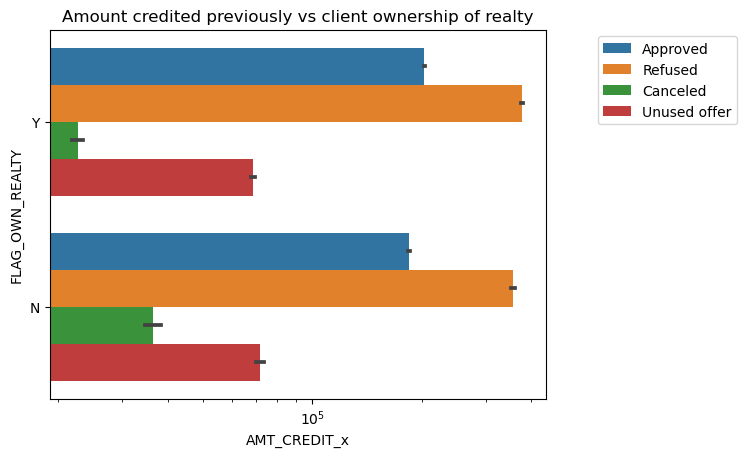

In [135]:
sns.barplot(x=merged_df.AMT_CREDIT_x, y=merged_df.FLAG_OWN_REALTY, hue=merged_df.NAME_CONTRACT_STATUS, data=merged_df)
plt.xscale('log')
plt.title('Amount credited previously vs client ownership of realty')
plt.legend(loc='upper right', bbox_to_anchor=(1.4,1.0))

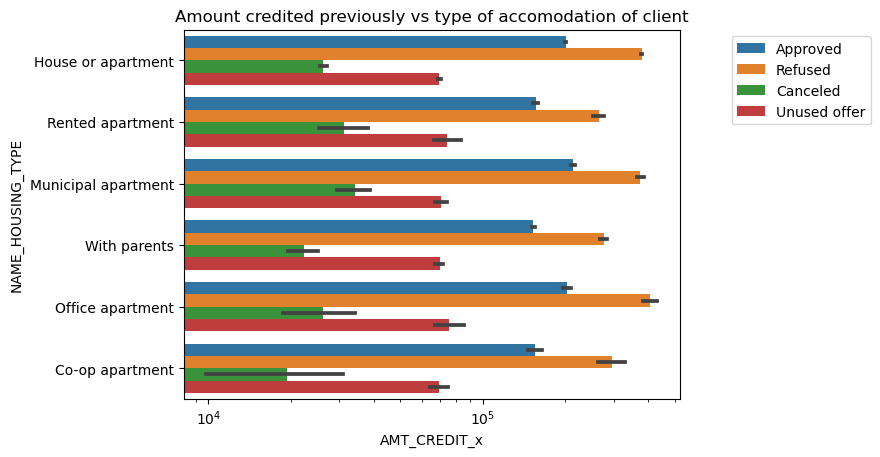

In [136]:
sns.barplot(x=merged_df.AMT_CREDIT_x, y=merged_df.NAME_HOUSING_TYPE, hue=merged_df.NAME_CONTRACT_STATUS, data=merged_df)
plt.xscale('log')
plt.title('Amount credited previously vs type of accomodation of client')
plt.legend(loc='upper right', bbox_to_anchor=(1.4,1.0))

In [ ]:
#multivariate analysis for the merged data frame

In [137]:
merged_df=merged_df.drop('SK_ID_PREV', axis=1)

In [138]:
merged_df_corr=merged_df.corr()
merged_df_corr

,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,HOUR_APPR_PROCESS_START_x,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,TARGET,CNT_CHILDREN,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_ANNUITY_x,1.000000,0.807590,0.818081,0.821127,-0.045108,0.284468,-0.016413,0.406039,-0.016157,-0.045719,...,-0.009470,-0.009941,-0.009134,-0.011200,0.004921,0.002261,0.001561,0.026635,0.022283,0.155063
AMT_APPLICATION,0.807590,1.000000,0.973441,0.999849,-0.018540,0.140405,-0.008083,0.684798,-0.006970,-0.035646,...,0.005644,-0.003244,0.005795,-0.005567,0.002611,0.004604,-0.000073,0.025140,0.004219,0.072801
AMT_CREDIT_x,0.818081,0.973441,1.000000,0.992858,-0.026264,0.141047,-0.010348,0.674559,-0.003947,-0.038204,...,0.005594,-0.002178,0.005801,-0.004764,0.002510,0.004128,0.000404,0.026764,0.001652,0.081790
AMT_GOODS_PRICE_x,0.821127,0.999849,0.992858,1.000000,-0.049405,0.286255,-0.016292,0.676325,-0.000530,-0.051539,...,0.006137,-0.004088,0.006382,-0.006566,0.002754,0.006121,0.003109,0.028366,0.031244,0.169060
HOUR_APPR_PROCESS_START_x,-0.045108,-0.018540,-0.026264,-0.049405,1.000000,-0.037472,0.017083,-0.049316,-0.035929,-0.011086,...,-0.015717,-0.007503,-0.015598,-0.007989,-0.006841,0.002964,-0.001131,0.041833,-0.002506,-0.067532
DAYS_DECISION,0.284468,0.140405,0.141047,0.286255,-0.037472,1.000000,-0.019929,0.239317,0.044883,-0.010299,...,-0.017711,-0.004111,-0.018202,0.000496,-0.002609,0.000030,0.010308,-0.030924,0.072203,0.162917
SELLERPLACE_AREA,-0.016413,-0.008083,-0.010348,-0.016292,0.017083,-0.019929,1.000000,-0.009732,-0.003077,0.000308,...,-0.001518,-0.001687,-0.001530,-0.001405,0.000068,-0.000223,-0.001200,0.001179,-0.002434,-0.013274
CNT_PAYMENT,0.406039,0.684798,0.674559,0.676325,-0.049316,0.239317,-0.009732,1.000000,0.031781,-0.042258,...,0.022529,0.008039,0.022645,0.004167,-0.001645,0.004144,0.003467,0.019693,0.025216,0.151308
TARGET,-0.016157,-0.006970,-0.003947,-0.000530,-0.035929,0.044883,-0.003077,0.031781,1.000000,0.007648,...,0.016546,0.033950,0.016449,0.030157,0.001365,0.002578,0.000747,-0.015613,0.000616,0.022243
CNT_CHILDREN,-0.045719,-0.035646,-0.038204,-0.051539,-0.011086,-0.010299,0.000308,-0.042258,0.007648,1.000000,...,0.022687,0.005305,0.022137,0.002455,-0.001393,-0.003430,0.002253,-0.024668,-0.010763,-0.055712


Text(0.5, 1.0, 'correlation mattrix for merged data frame')

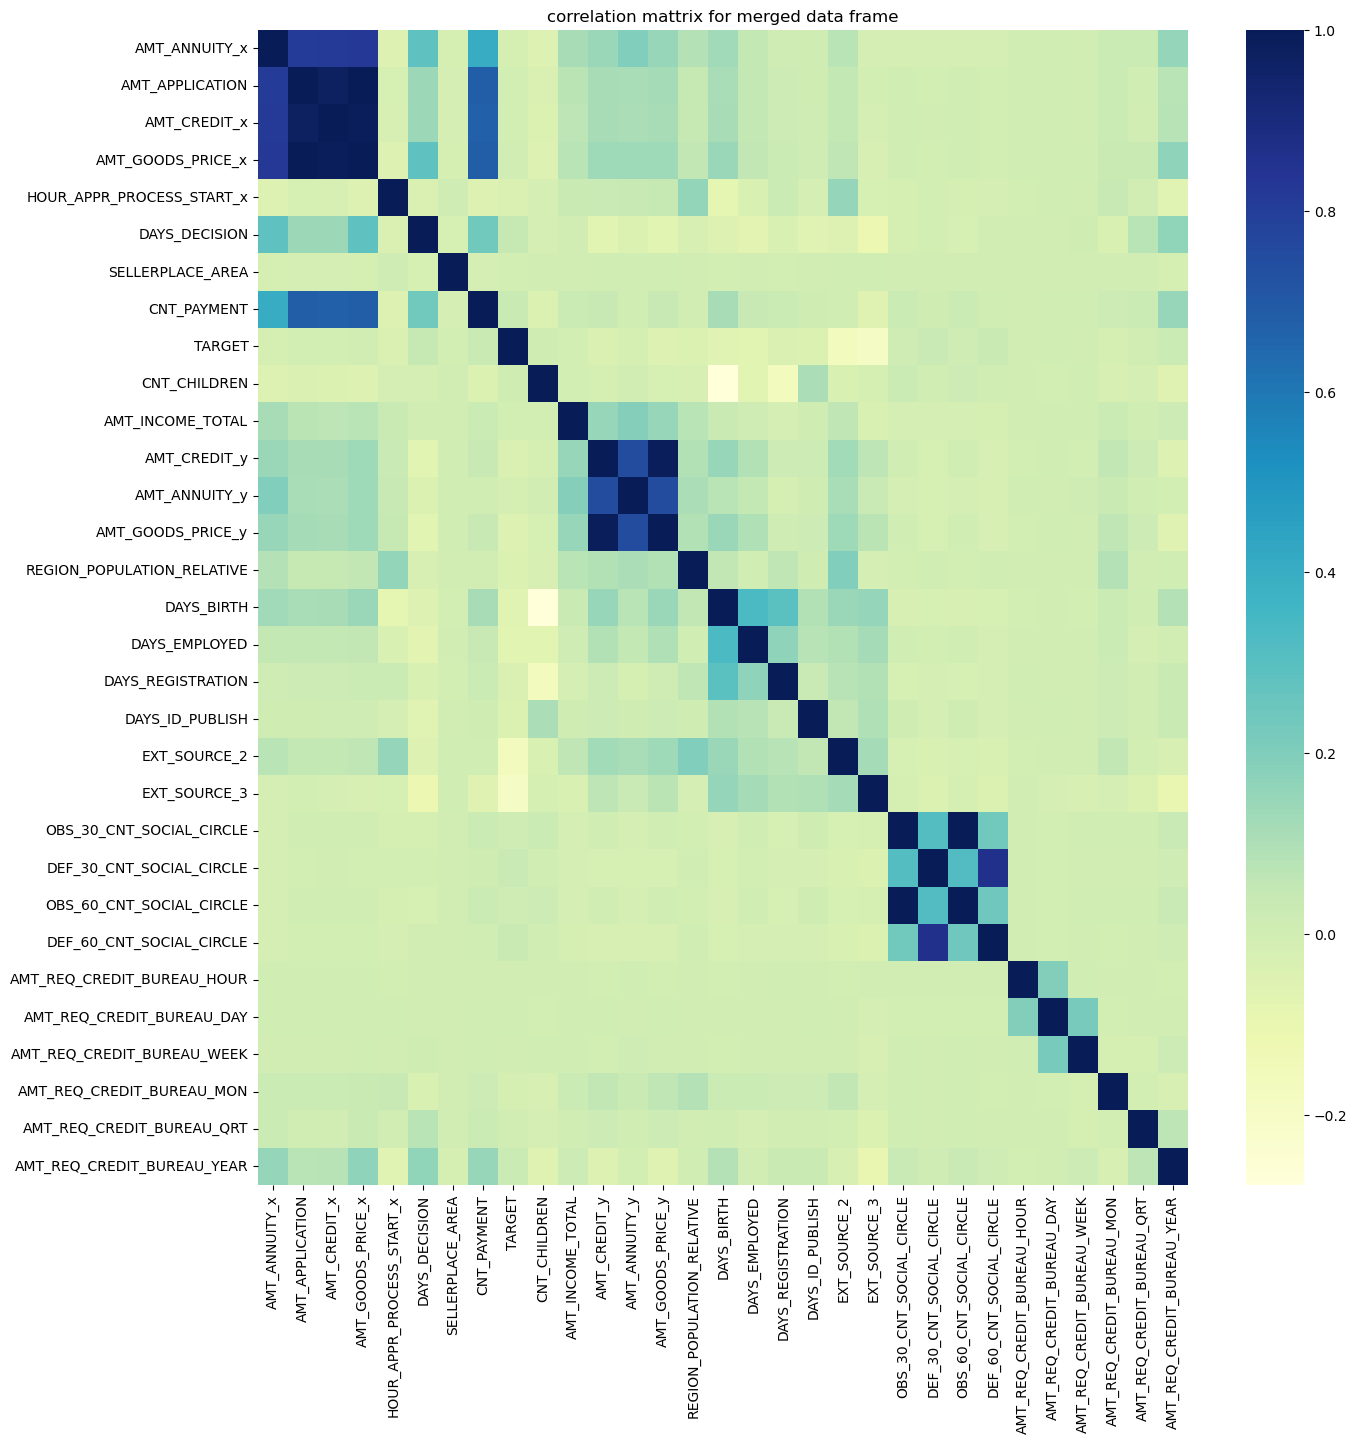

In [139]:
plt.figure(figsize=(15,15))
sns.heatmap(merged_df_corr, cmap="YlGnBu")
plt.title('correlation mattrix for merged data frame')

In [140]:
top10=merged_df_corr.unstack().sort_values(kind='quicksort').drop_duplicates().nlargest(10)
top10

AMT_ANNUITY_x             AMT_ANNUITY_x               1.000000
AMT_APPLICATION           AMT_GOODS_PRICE_x           0.999849
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998537
AMT_CREDIT_x              AMT_GOODS_PRICE_x           0.992858
AMT_CREDIT_y              AMT_GOODS_PRICE_y           0.985562
AMT_CREDIT_x              AMT_APPLICATION             0.973441
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.862820
AMT_GOODS_PRICE_x         AMT_ANNUITY_x               0.821127
AMT_ANNUITY_x             AMT_CREDIT_x                0.818081
                          AMT_APPLICATION             0.807590
dtype: float64